In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib
import os

In [3]:
df = pd.read_csv("Rainfallpredictiondataset.csv")
pd.set_option("display.max_columns", None)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [7]:
for feature in df.columns:
    print(feature)
    print(df[feature].dtypes)
    print(len(df[feature].unique()))



Date
object
3436
Location
object
49
MinTemp
float64
390
MaxTemp
float64
506
Rainfall
float64
682
Evaporation
float64
359
Sunshine
float64
146
WindGustDir
object
17
WindGustSpeed
float64
68
WindDir9am
object
17
WindDir3pm
object
17
WindSpeed9am
float64
44
WindSpeed3pm
float64
45
Humidity9am
float64
102
Humidity3pm
float64
102
Pressure9am
float64
547
Pressure3pm
float64
550
Cloud9am
float64
11
Cloud3pm
float64
11
Temp9am
float64
442
Temp3pm
float64
503
RainToday
object
3
RainTomorrow
object
3


In [8]:
numerical_feature= [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


In [12]:
print("Numerical features:",numerical_feature)
print("discrete_features:",discrete_feature)
print("continuous_features:",continuous_feature)
print("categorical_features:",categorical_feature)
 

Numerical features: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
discrete_features: ['Cloud9am', 'Cloud3pm']
continuous_features: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
categorical_features: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [13]:
df.isnull()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
145456,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
145457,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
145458,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [15]:
def randomsampleimputation(df, variable):
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    print( random_sample)
    random_sample.index=df[df[variable].isnull()].index
    print(random_sample.index)
    df.loc[df[variable].isnull(),variable]=random_sample

In [16]:
randomsampleimputation(df, "Cloud9am")
randomsampleimputation(df, "Cloud3pm")
randomsampleimputation(df, "Evaporation")
randomsampleimputation(df, "Sunshine")

22879     7.0
10874     8.0
38921     0.0
101235    8.0
59502     8.0
         ... 
34053     0.0
30769     8.0
120229    1.0
80932     8.0
103208    8.0
Name: Cloud9am, Length: 55888, dtype: float64
Int64Index([     1,      2,      3,      5,      7,      8,      9,     10,
                13,     14,
            ...
            145448, 145449, 145450, 145451, 145452, 145453, 145454, 145455,
            145456, 145457],
           dtype='int64', length=55888)
73090     0.0
88261     1.0
13698     5.0
105991    5.0
47680     8.0
         ... 
140605    6.0
104112    8.0
39551     1.0
58647     5.0
121219    1.0
Name: Cloud3pm, Length: 59358, dtype: float64
Int64Index([     0,      1,      3,      5,      6,      7,      8,      9,
                10,     14,
            ...
            145447, 145448, 145449, 145450, 145451, 145453, 145454, 145455,
            145456, 145457],
           dtype='int64', length=59358)
104105     2.4
86880      3.6
21386      2.6
138803    18.4
9431      

In [17]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation       0.000000
Sunshine          0.000000
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am          0.000000
Cloud3pm          0.000000
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [18]:
df


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,2.4,8.3,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,3.6,10.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,2.6,4.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,18.4,8.9,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.4,3.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,1.4,7.8,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,7.6,13.5,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,6.8,11.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,2.6,13.2,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [19]:
corrmat = df.corr(method = "spearman")
print(corrmat.round(2))

               MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp           1.00     0.74      0.02         0.33      0.06   
MaxTemp           0.74     1.00     -0.30         0.40      0.26   
Rainfall          0.02    -0.30      1.00        -0.18     -0.21   
Evaporation       0.33     0.40     -0.18         1.00      0.21   
Sunshine          0.06     0.26     -0.21         0.21      1.00   
WindGustSpeed     0.20     0.09      0.13         0.15     -0.00   
WindSpeed9am      0.18     0.02      0.08         0.12      0.01   
WindSpeed3pm      0.18     0.07      0.07         0.10      0.03   
Humidity9am      -0.22    -0.47      0.44        -0.31     -0.27   
Humidity3pm       0.03    -0.46      0.44        -0.23     -0.32   
Pressure9am      -0.46    -0.35     -0.15        -0.22      0.01   
Pressure3pm      -0.47    -0.44     -0.06        -0.24     -0.03   
Cloud9am          0.04    -0.18      0.24        -0.10     -0.30   
Cloud3pm          0.01    -0.17      0.19       

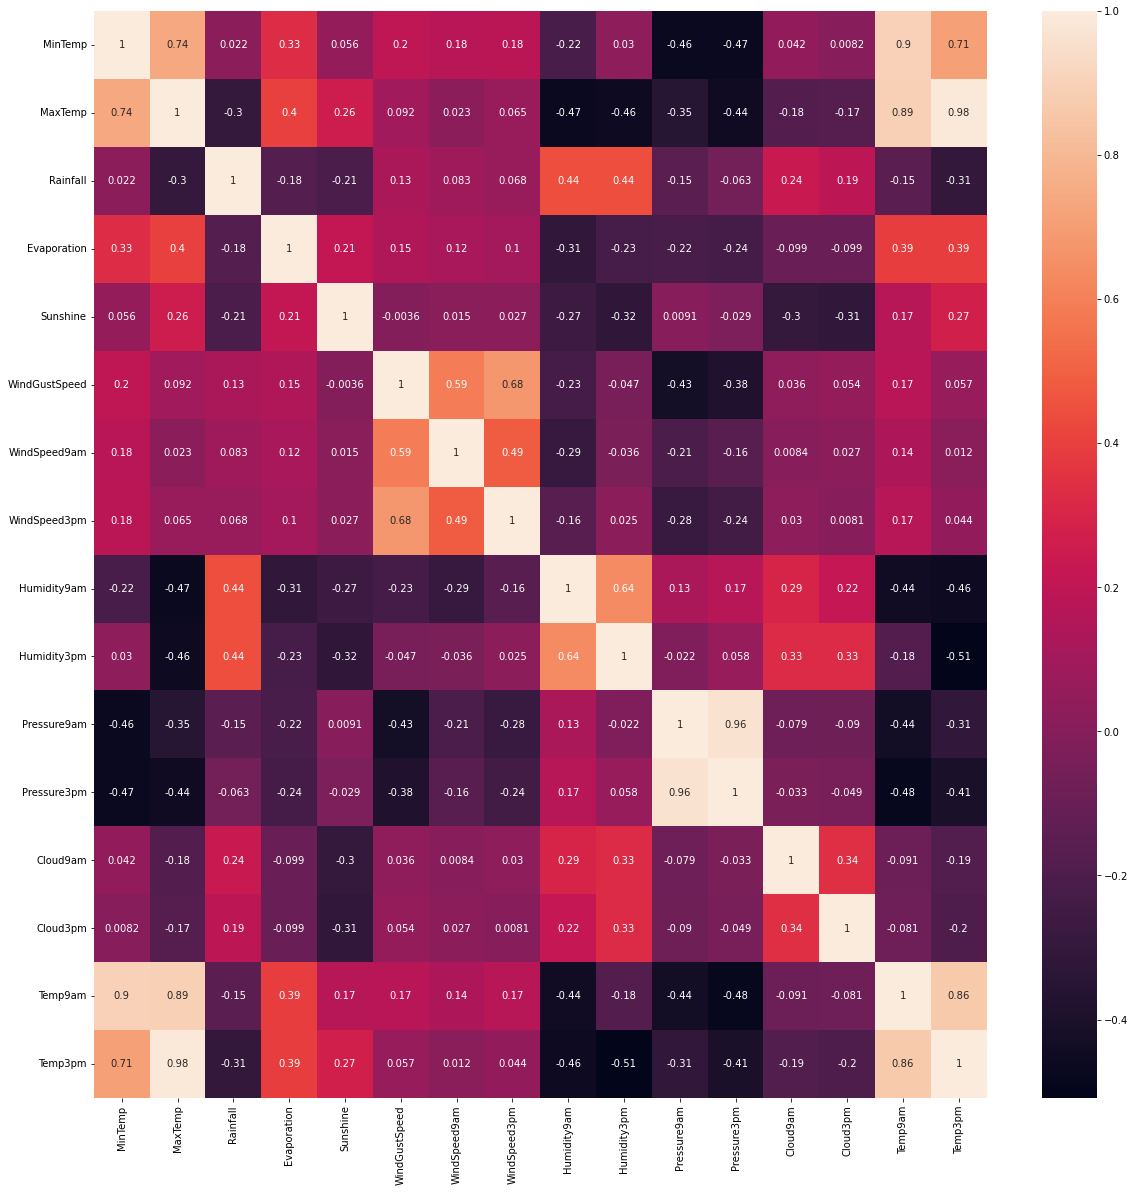

In [20]:
plt.figure(figsize=(20,20))
g=sns.heatmap(corrmat,annot=True)

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


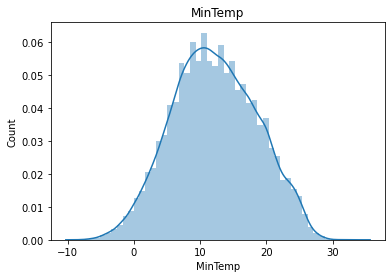

<Figure size 1080x1080 with 0 Axes>

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


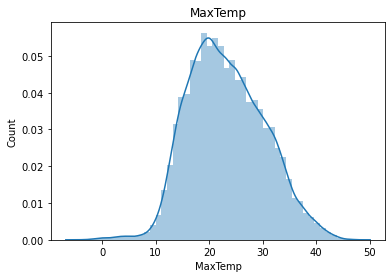

<Figure size 1080x1080 with 0 Axes>

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


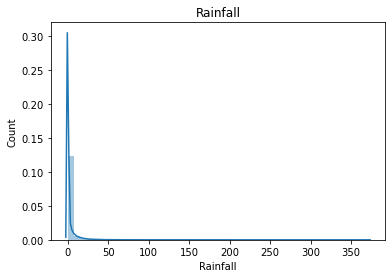

<Figure size 1080x1080 with 0 Axes>

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


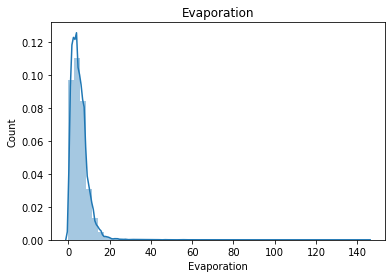

<Figure size 1080x1080 with 0 Axes>

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


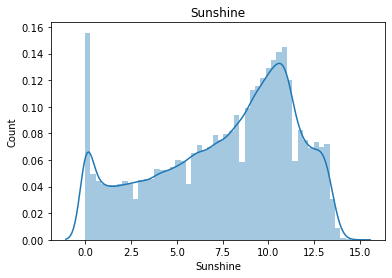

<Figure size 1080x1080 with 0 Axes>

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


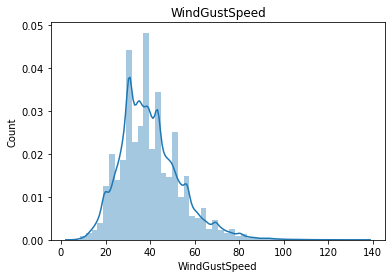

<Figure size 1080x1080 with 0 Axes>

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


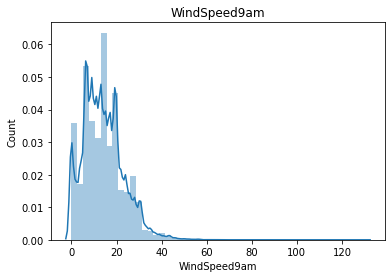

<Figure size 1080x1080 with 0 Axes>

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


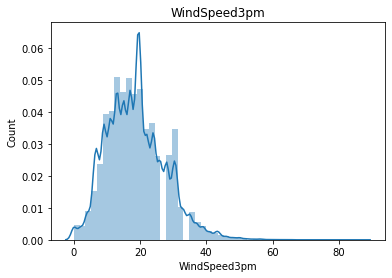

<Figure size 1080x1080 with 0 Axes>

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


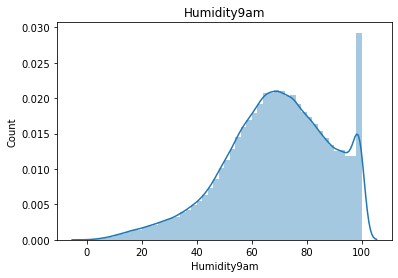

<Figure size 1080x1080 with 0 Axes>

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


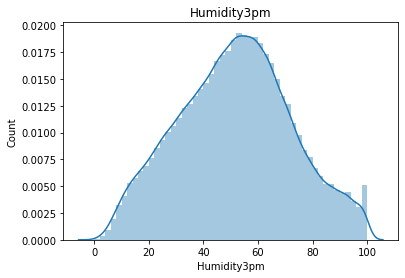

<Figure size 1080x1080 with 0 Axes>

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


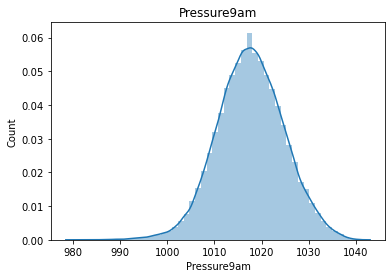

<Figure size 1080x1080 with 0 Axes>

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


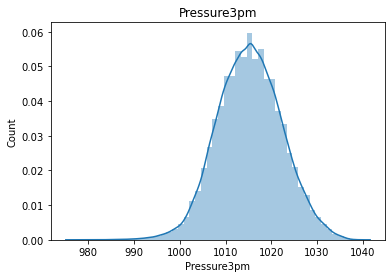

<Figure size 1080x1080 with 0 Axes>

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


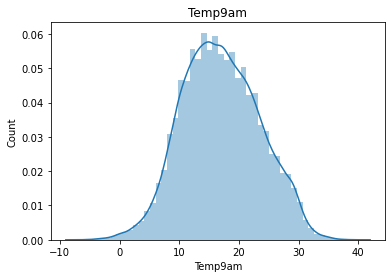

<Figure size 1080x1080 with 0 Axes>

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


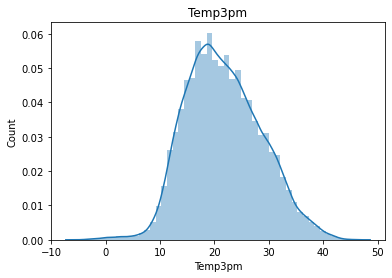

<Figure size 1080x1080 with 0 Axes>

In [21]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

In [22]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation       0.000000
Sunshine          0.000000
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am          0.000000
Cloud3pm          0.000000
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [23]:
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())

In [24]:
df.isnull().sum()*100/len(df)

Date             0.000000
Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      7.098859
WindGustSpeed    0.000000
WindDir9am       7.263853
WindDir3pm       2.906641
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        2.241853
RainTomorrow     2.245978
dtype: float64

In [25]:
def mode_nan(df,variable):
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)
mode_nan(df,"Cloud9am")
mode_nan(df,"Cloud3pm")

In [26]:
df.isnull().sum()*100/len(df)

Date             0.000000
Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      7.098859
WindGustSpeed    0.000000
WindDir9am       7.263853
WindDir3pm       2.906641
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        2.241853
RainTomorrow     2.245978
dtype: float64

In [27]:
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first = True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,2.4,8.3,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,3.6,10.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,2.6,4.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,18.4,8.9,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.4,3.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,1.4,7.8,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,0,0
145456,2017-06-22,Uluru,3.6,25.3,0.0,7.6,13.5,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,0,0
145457,2017-06-23,Uluru,5.4,26.9,0.0,6.8,11.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,0,0
145458,2017-06-24,Uluru,7.8,27.0,0.0,2.6,13.2,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [28]:
for feature in categorical_feature:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

Date Index(['2007-11-01', '2007-12-15', '2008-02-03', '2008-01-31', '2008-01-30',
       '2008-01-19', '2008-01-18', '2008-01-16', '2008-01-12', '2007-11-30',
       ...
       '2008-05-08', '2008-05-09', '2008-01-03', '2008-01-02', '2008-05-10',
       '2008-05-11', '2008-05-12', '2008-05-13', '2008-05-14', '2007-12-25'],
      dtype='object', name='Date', length=3436)
Location Index(['Portland', 'Walpole', 'Cairns', 'Dartmoor', 'NorfolkIsland',
       'MountGambier', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'MountGinini',
       'NorahHead', 'Darwin', 'Sydney', 'SydneyAirport', 'Ballarat',
       'GoldCoast', 'Watsonia', 'Newcastle', 'Hobart', 'Wollongong',
       'Williamtown', 'Launceston', 'Brisbane', 'MelbourneAirport', 'Adelaide',
       'Sale', 'Albury', 'Perth', 'Melbourne', 'Nuriootpa', 'Penrith',
       'BadgerysCreek', 'PerthAirport', 'Tuggeranong', 'Richmond', 'Bendigo',
       'Canberra', 'WaggaWagga', 'Townsville', 'Katherine', 'PearceRAAF',
       'SalmonGums', 'Nhil', 

In [29]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

In [30]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,18.4,8.9,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,1.4,7.8,15.0,31.0,13.0,13.0,13.0,11.0,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,0,0
145456,2017-06-22,Uluru,3.6,25.3,0.0,7.6,13.5,0.0,22.0,13.0,2.0,13.0,9.0,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,0,0
145457,2017-06-23,Uluru,5.4,26.9,0.0,6.8,11.0,3.0,37.0,13.0,3.0,9.0,9.0,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,0,0
145458,2017-06-24,Uluru,7.8,27.0,0.0,2.6,13.2,12.0,28.0,11.0,2.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [31]:
df.isnull().sum()*100/len(df)

Date             0.000000
Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      7.098859
WindGustSpeed    0.000000
WindDir9am       7.263853
WindDir3pm       2.906641
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        0.000000
RainTomorrow     0.000000
dtype: float64

In [32]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])


In [33]:
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [34]:
df1 = df.groupby(["Location"])["RainTomorrow"].value_counts()

In [35]:
df1

Location     RainTomorrow
Adelaide     0               2505
             1                688
Albany       0               2138
             1                902
Albury       0               2422
                             ... 
Witchcliffe  1                879
Wollongong   0               2327
             1                713
Woomera      0               2807
             1                202
Name: RainTomorrow, Length: 98, dtype: int64

In [36]:
df1 = df.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()

In [37]:
df1

RainTomorrow,0,1
Location,,
Adelaide,2505,688
Albany,2138,902
Albury,2422,618
AliceSprings,2796,244
BadgerysCreek,2426,583
Ballarat,2259,781
Bendigo,2478,562
Brisbane,2484,709
Cairns,2090,950


In [38]:
df1[1].sort_values(ascending = False)

Location
Portland            1095
Cairns               950
Walpole              949
Dartmoor             922
MountGambier         920
NorfolkIsland        919
Albany               902
Witchcliffe          879
CoffsHarbour         869
Sydney               865
Darwin               852
MountGinini          819
NorahHead            808
Ballarat             781
GoldCoast            775
SydneyAirport        774
Hobart               761
Watsonia             738
Newcastle            731
Wollongong           713
Brisbane             709
Williamtown          700
Launceston           699
Adelaide             688
MelbourneAirport     653
Perth                645
Sale                 643
Melbourne            636
Canberra             629
Albury               618
Penrith              595
Nuriootpa            592
BadgerysCreek        583
Tuggeranong          568
PerthAirport         567
Bendigo              562
Richmond             560
WaggaWagga           536
Townsville           519
PearceRAAF      

In [39]:
df1[1].sort_values(ascending = False).index

Index(['Portland', 'Cairns', 'Walpole', 'Dartmoor', 'MountGambier',
       'NorfolkIsland', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'Sydney',
       'Darwin', 'MountGinini', 'NorahHead', 'Ballarat', 'GoldCoast',
       'SydneyAirport', 'Hobart', 'Watsonia', 'Newcastle', 'Wollongong',
       'Brisbane', 'Williamtown', 'Launceston', 'Adelaide', 'MelbourneAirport',
       'Perth', 'Sale', 'Melbourne', 'Canberra', 'Albury', 'Penrith',
       'Nuriootpa', 'BadgerysCreek', 'Tuggeranong', 'PerthAirport', 'Bendigo',
       'Richmond', 'WaggaWagga', 'Townsville', 'PearceRAAF', 'SalmonGums',
       'Moree', 'Cobar', 'Mildura', 'Katherine', 'AliceSprings', 'Nhil',
       'Woomera', 'Uluru'],
      dtype='object', name='Location')

In [40]:
len(df1[1].sort_values(ascending = False).index)

49

In [41]:
location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}
df["Location"] = df["Location"].map(location)

In [42]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,30,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0
1,2008-12-02,30,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0
2,2008-12-03,30,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0
3,2008-12-04,30,9.2,28.0,0.0,18.4,8.9,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0
4,2008-12-05,30,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,49,2.8,23.4,0.0,1.4,7.8,15.0,31.0,13.0,13.0,13.0,11.0,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,0,0
145456,2017-06-22,49,3.6,25.3,0.0,7.6,13.5,0.0,22.0,13.0,2.0,13.0,9.0,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,0,0
145457,2017-06-23,49,5.4,26.9,0.0,6.8,11.0,3.0,37.0,13.0,3.0,9.0,9.0,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,0,0
145458,2017-06-24,49,7.8,27.0,0.0,2.6,13.2,12.0,28.0,11.0,2.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [43]:
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%dT", errors = "coerce")

In [44]:
df["Date_month"] = df["Date"].dt.month
df["Date_day"] = df["Date"].dt.day
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,2008-12-01,30,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,12,1
1,2008-12-02,30,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0,12,2
2,2008-12-03,30,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0,12,3
3,2008-12-04,30,9.2,28.0,0.0,18.4,8.9,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0,12,4
4,2008-12-05,30,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,49,2.8,23.4,0.0,1.4,7.8,15.0,31.0,13.0,13.0,13.0,11.0,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,0,0,6,21
145456,2017-06-22,49,3.6,25.3,0.0,7.6,13.5,0.0,22.0,13.0,2.0,13.0,9.0,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,0,0,6,22
145457,2017-06-23,49,5.4,26.9,0.0,6.8,11.0,3.0,37.0,13.0,3.0,9.0,9.0,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,0,0,6,23
145458,2017-06-24,49,7.8,27.0,0.0,2.6,13.2,12.0,28.0,11.0,2.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,6,24


In [45]:
corrmat = df.corr()
print(corrmat)

               Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
Location       1.000000 -0.061742  0.223153 -0.083733     0.147322  0.092247   
MinTemp       -0.061742  1.000000  0.733358  0.102339     0.263248  0.034800   
MaxTemp        0.223153  0.733358  1.000000 -0.073563     0.328950  0.233546   
Rainfall      -0.083733  0.102339 -0.073563  1.000000    -0.028288 -0.124629   
Evaporation    0.147322  0.263248  0.328950 -0.028288     1.000000  0.152067   
Sunshine       0.092247  0.034800  0.233546 -0.124629     0.152067  1.000000   
WindGustDir    0.109805  0.201842  0.196399 -0.002920     0.081549  0.076896   
WindGustSpeed -0.058381  0.171899  0.066451  0.125109     0.112609 -0.018424   
WindDir9am     0.109935  0.184559  0.194294  0.001634     0.101016  0.088234   
WindDir3pm    -0.018276  0.197900  0.105311  0.002983     0.054188  0.043932   
WindSpeed9am  -0.038539  0.173513  0.014389  0.084586     0.107269  0.002709   
WindSpeed3pm  -0.111321  0.173055  0.049

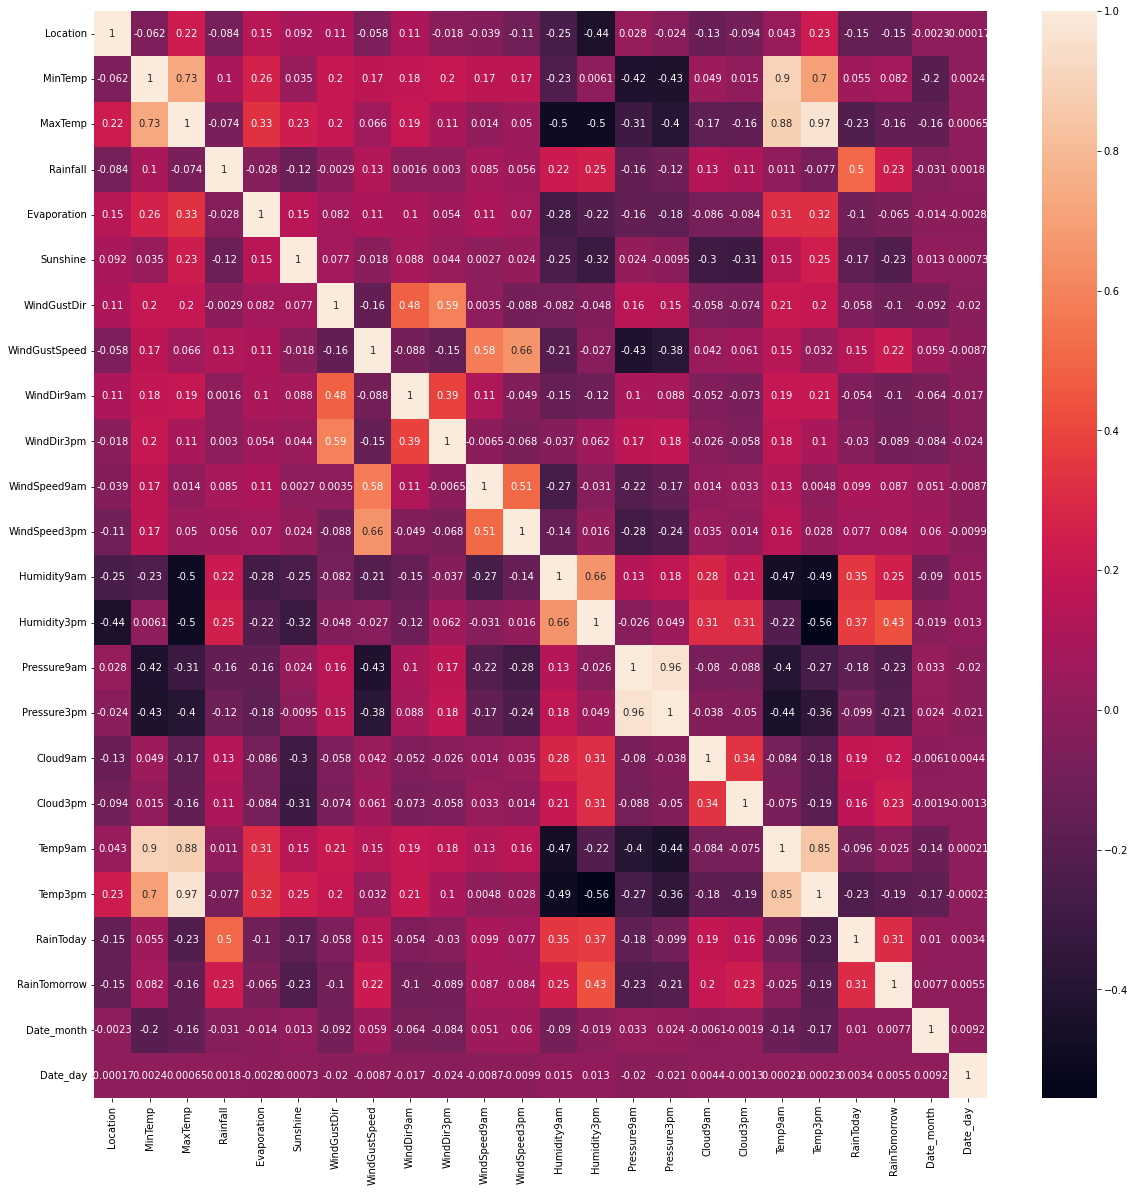

In [46]:
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

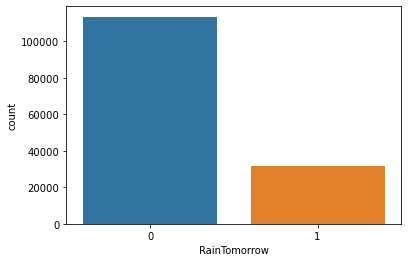

In [47]:
sns.countplot(df["RainTomorrow"])


In [48]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,2008-12-01,30,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,12,1
1,2008-12-02,30,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0,12,2
2,2008-12-03,30,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0,12,3
3,2008-12-04,30,9.2,28.0,0.0,18.4,8.9,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0,12,4
4,2008-12-05,30,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,49,2.8,23.4,0.0,1.4,7.8,15.0,31.0,13.0,13.0,13.0,11.0,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,0,0,6,21
145456,2017-06-22,49,3.6,25.3,0.0,7.6,13.5,0.0,22.0,13.0,2.0,13.0,9.0,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,0,0,6,22
145457,2017-06-23,49,5.4,26.9,0.0,6.8,11.0,3.0,37.0,13.0,3.0,9.0,9.0,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,0,0,6,23
145458,2017-06-24,49,7.8,27.0,0.0,2.6,13.2,12.0,28.0,11.0,2.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,6,24


C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Program Files\Anaconda

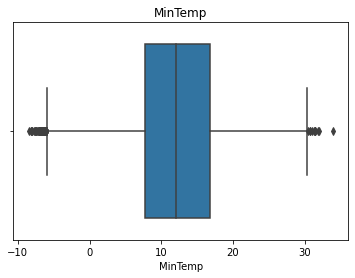

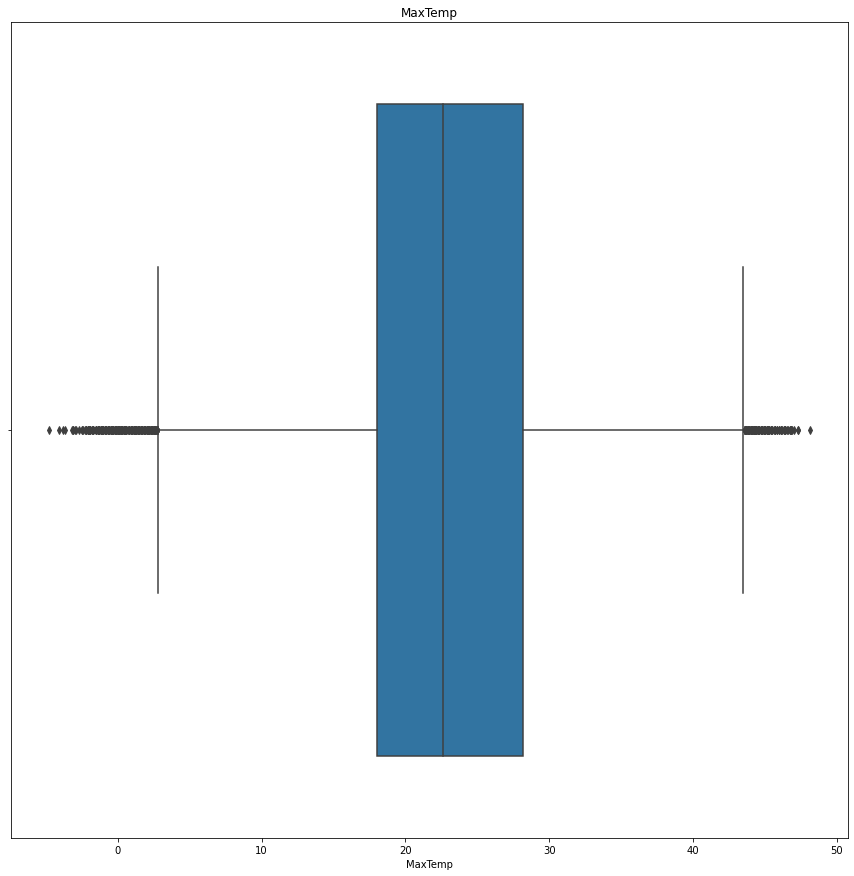

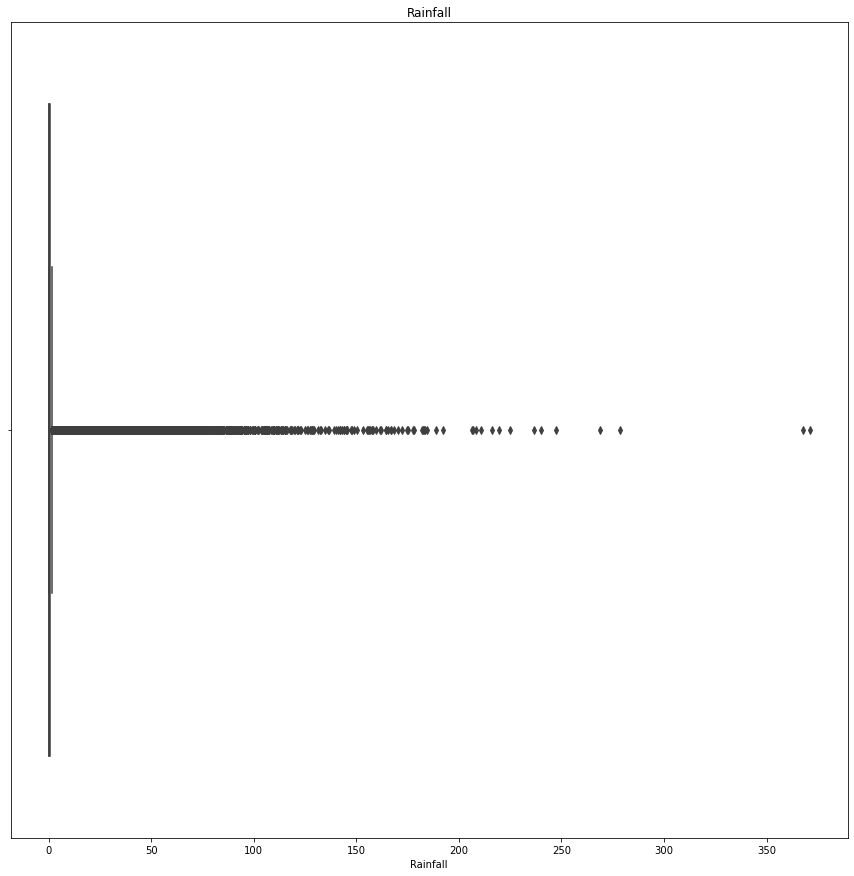

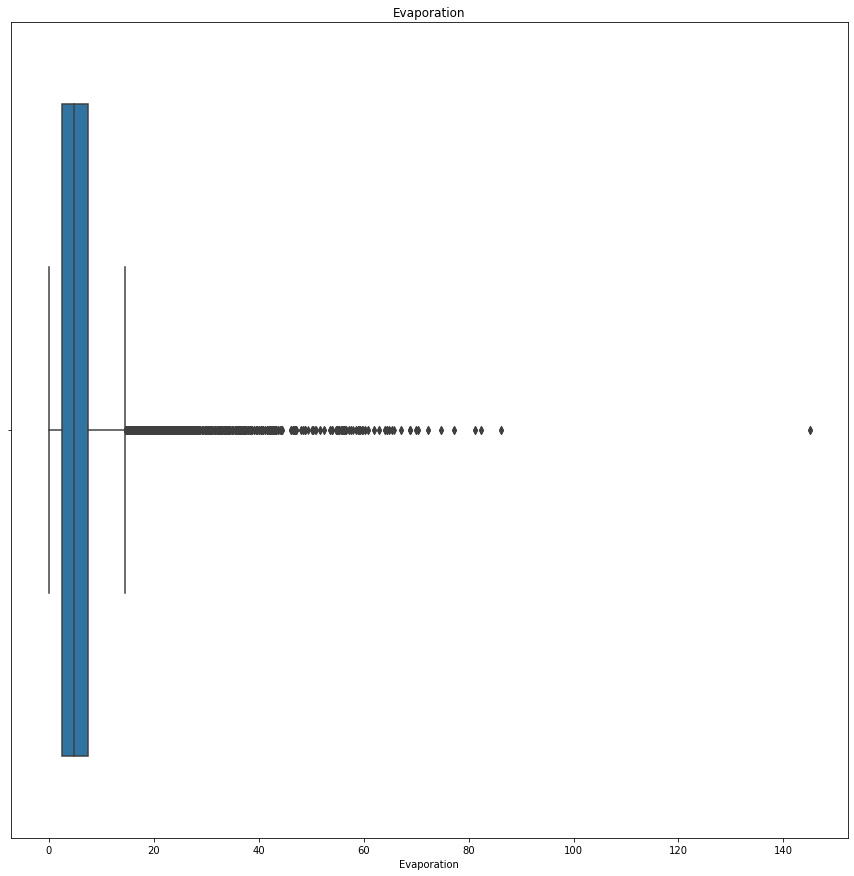

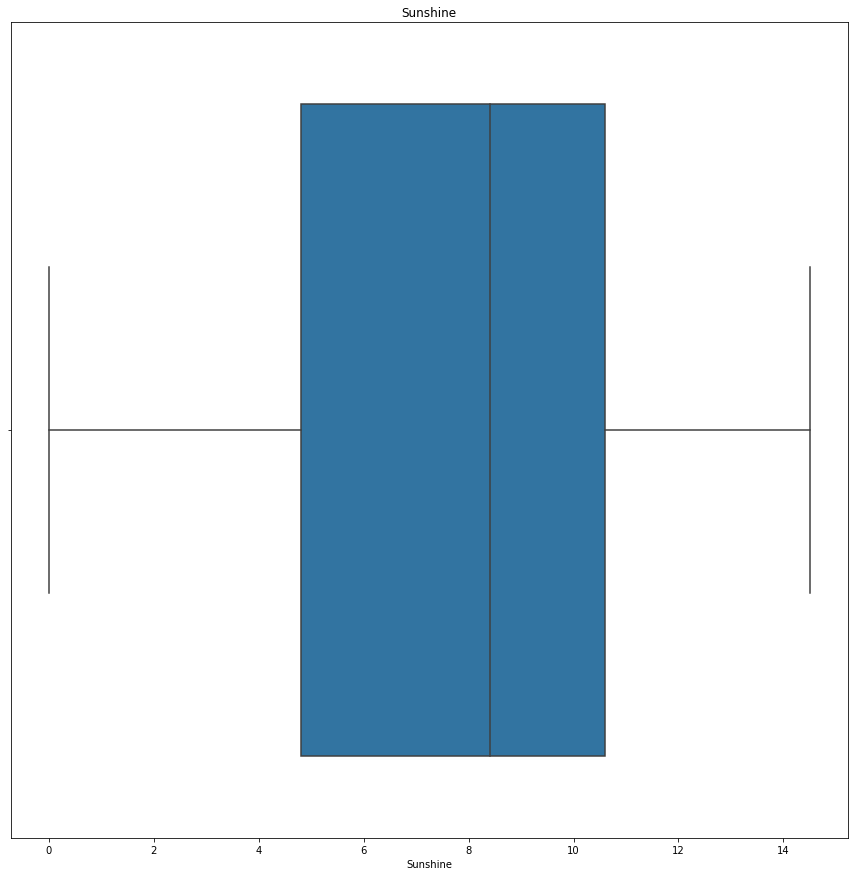

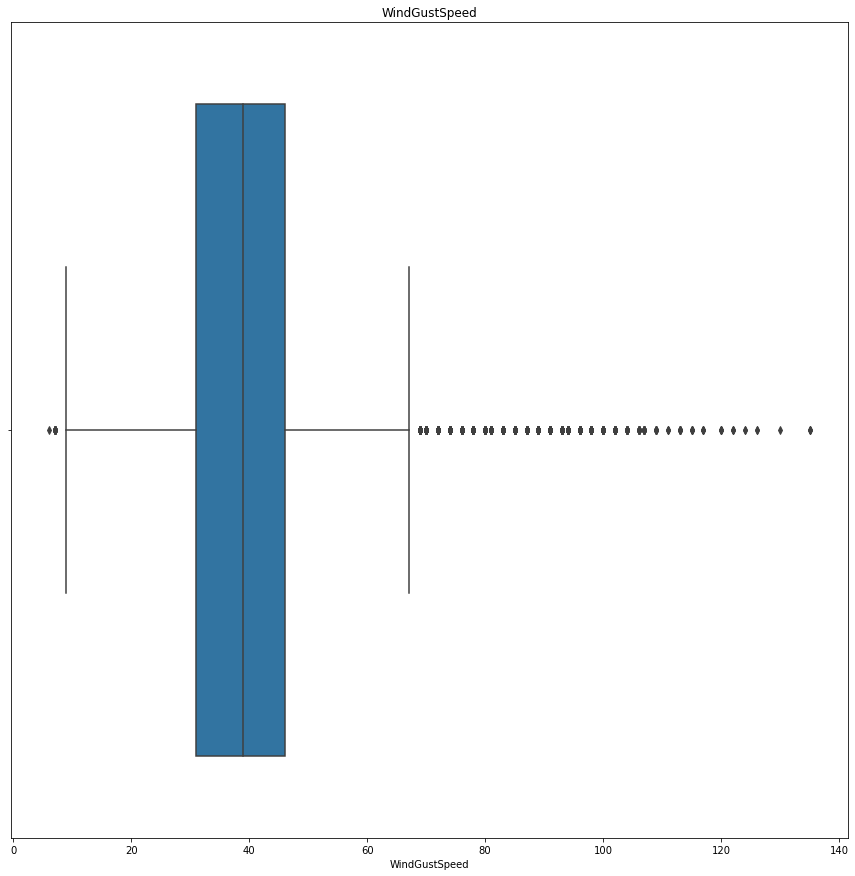

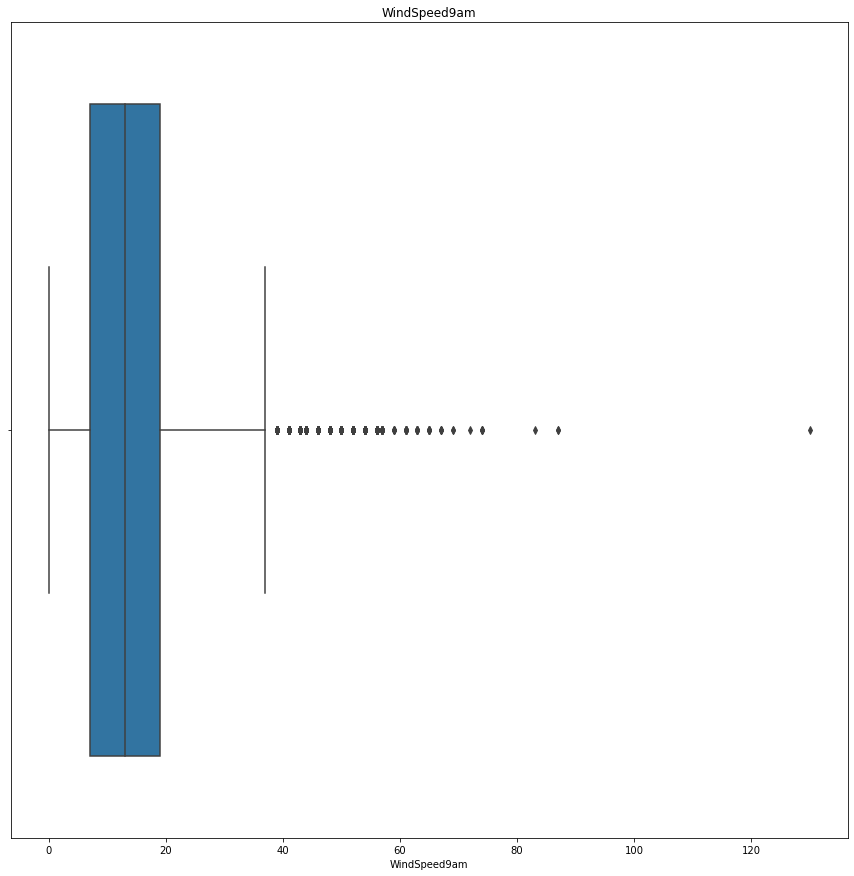

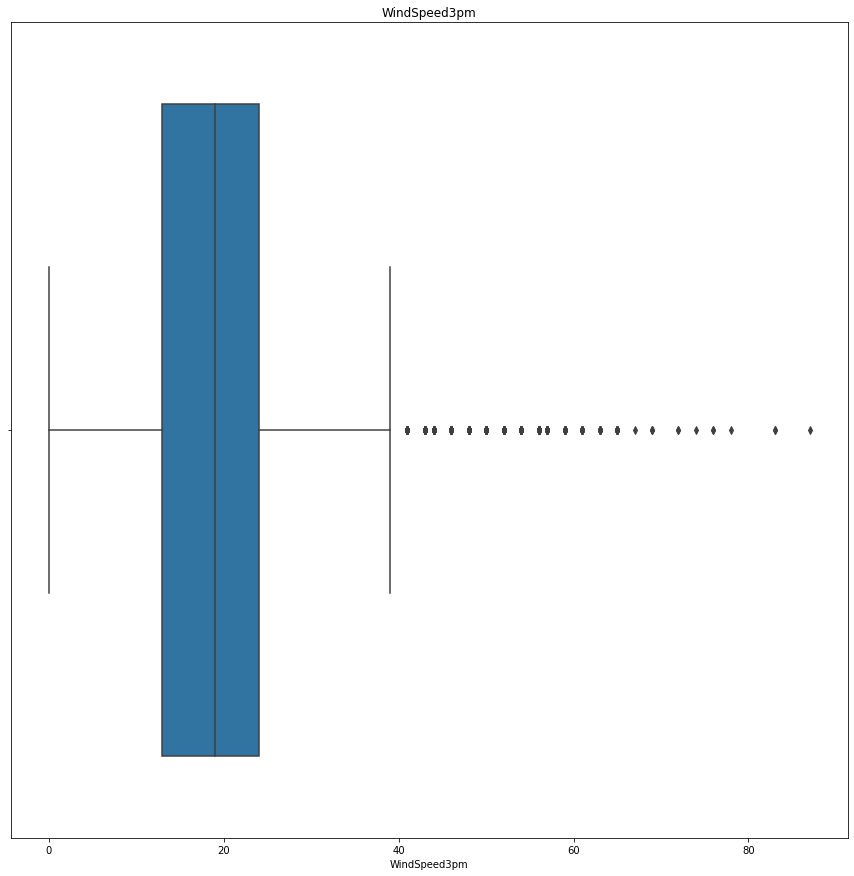

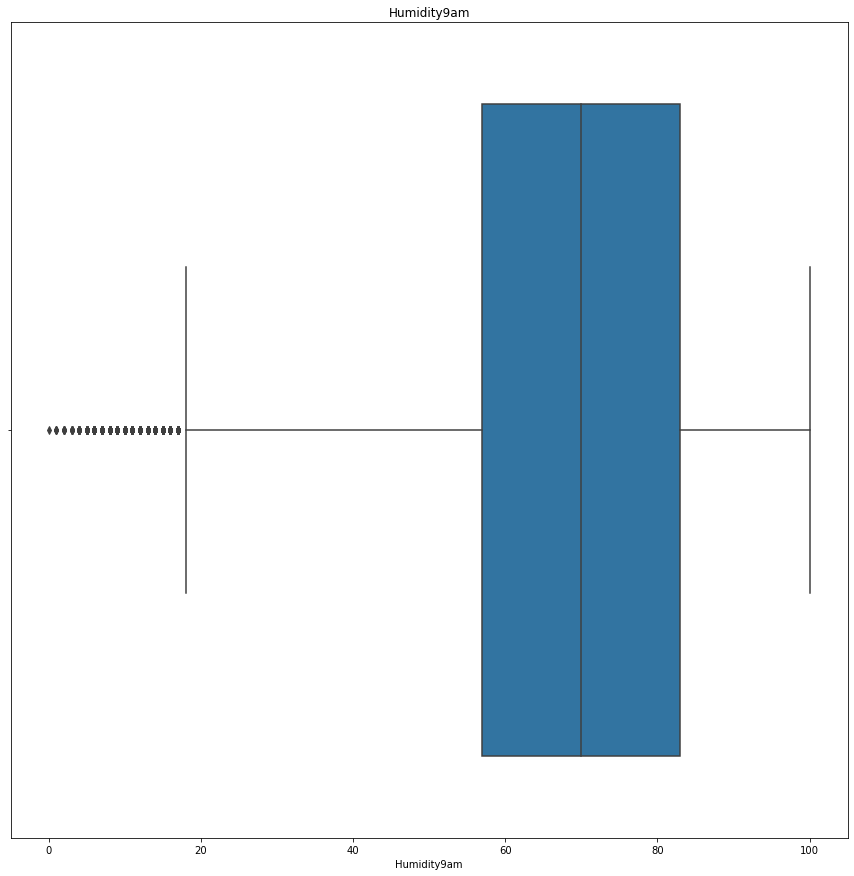

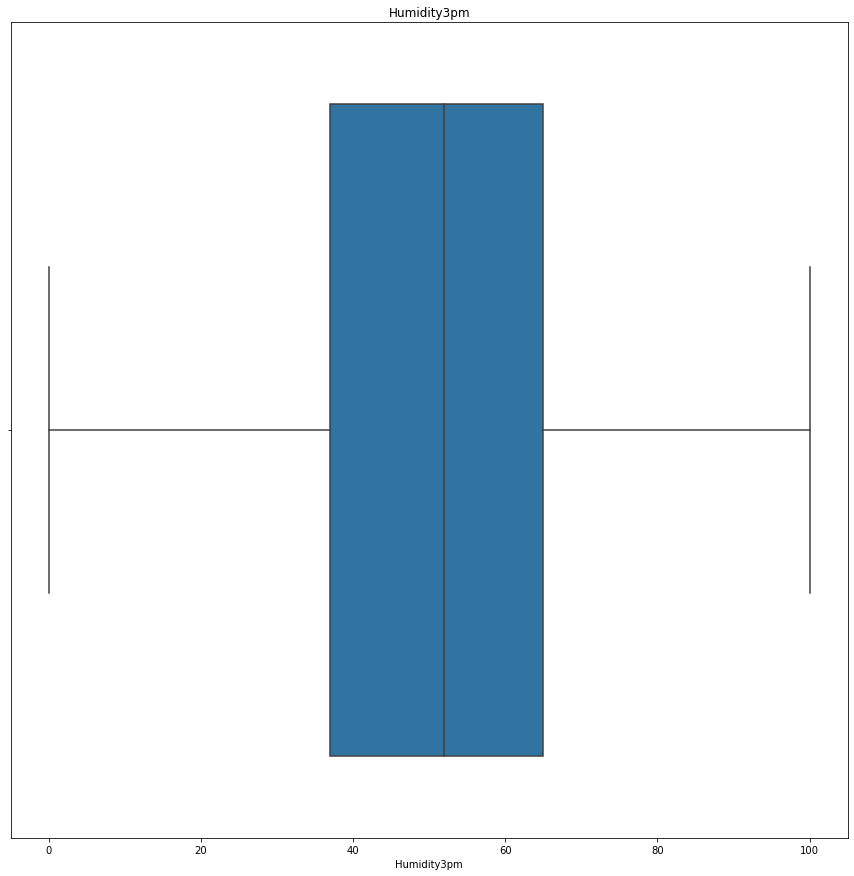

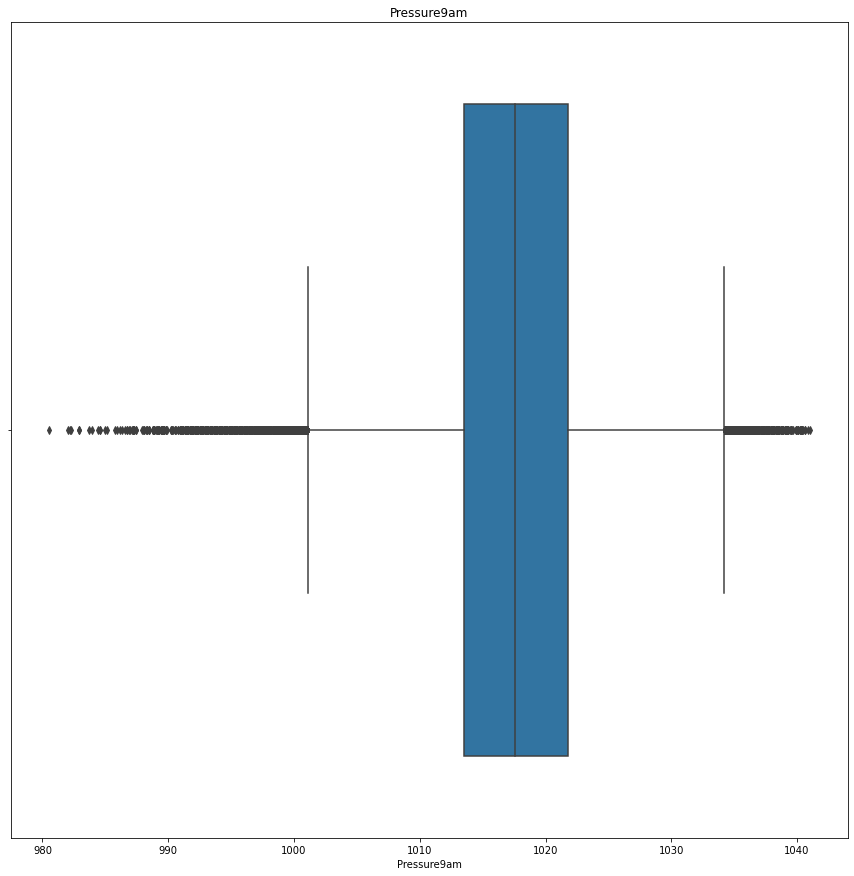

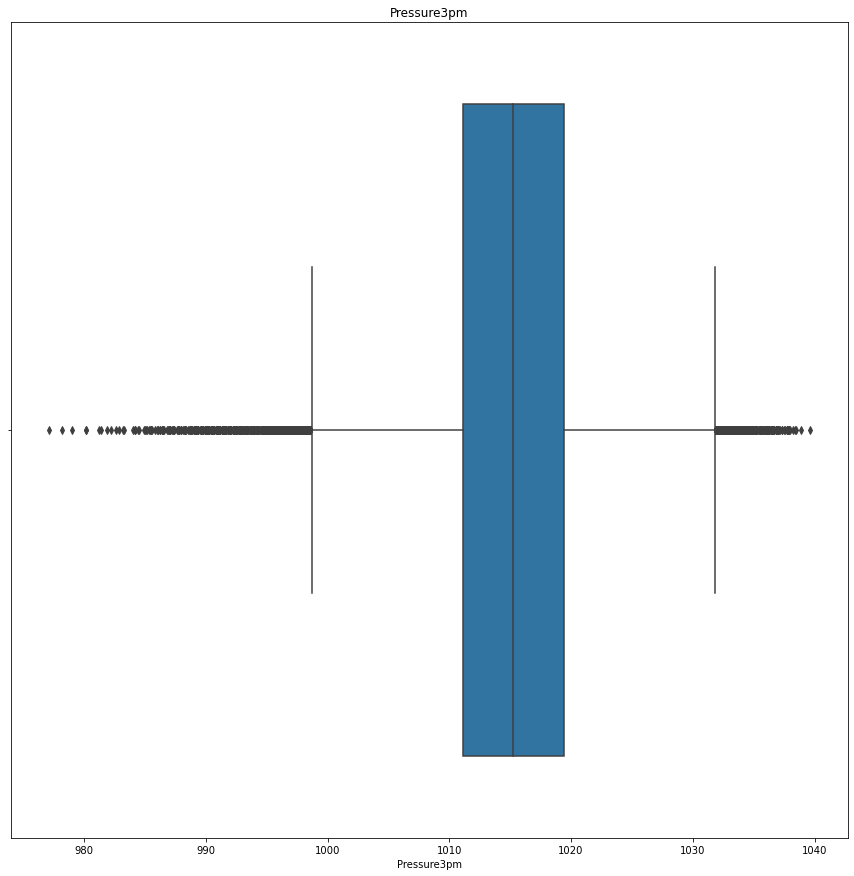

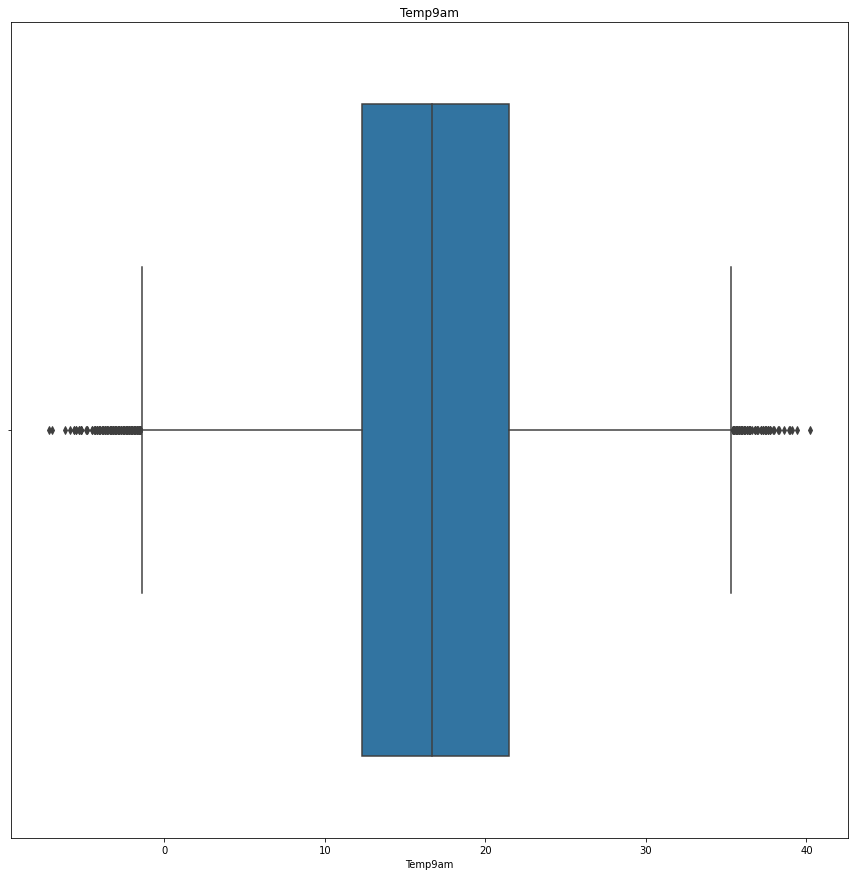

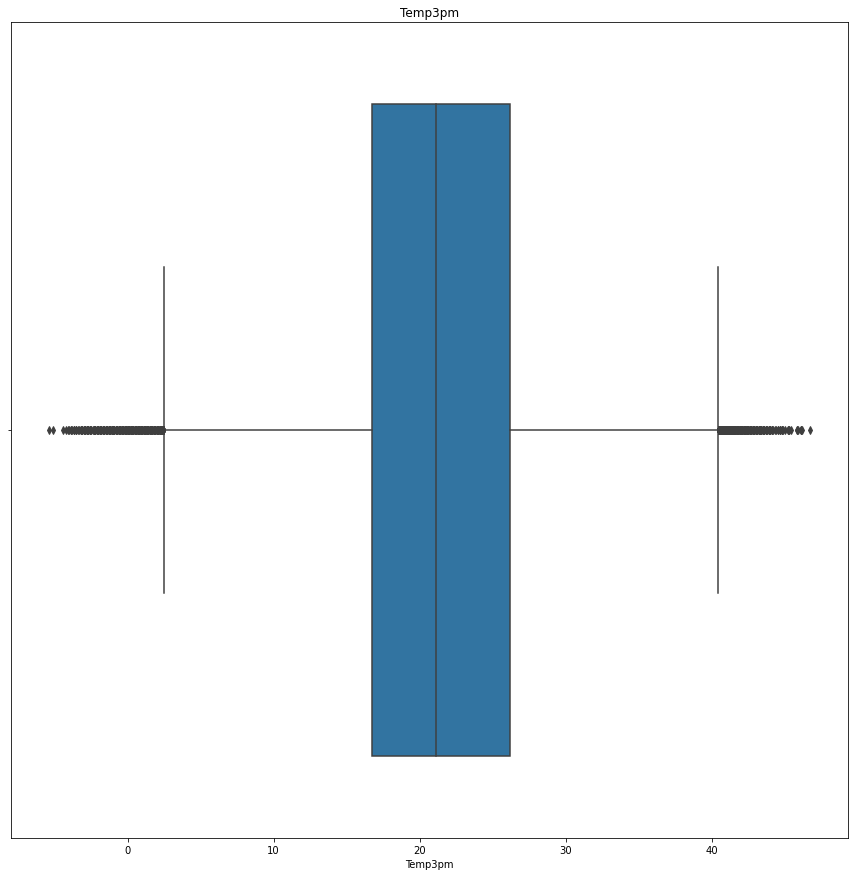

<Figure size 1080x1080 with 0 Axes>

In [49]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [50]:
def removeoutlier(df,variable):
    IQR=df[variable].quantile(0.75)-df[variable].quantile(0.25)
    lower_bridge=df[variable].quantile(0.25)-(IQR*1.5)
    upper_bridge=df[variable].quantile(0.75)+(IQR*1.5)
    print(lower_bridge, upper_bridge)
    df.loc[df[variable]>=upper_bridge,variable]=upper_bridge
    df.loc[df[variable]<=lower_bridge,variable]=lower_bridge

In [51]:
for feature in continuous_feature:
    print(feature)
    removeoutlier(df,feature)

MinTemp
-5.950000000000002 30.450000000000003
MaxTemp
2.700000000000001 43.5
Rainfall
-0.8999999999999999 1.5
Evaporation
-4.600000000000001 14.600000000000001
Sunshine
-3.8999999999999995 19.299999999999997
WindGustSpeed
8.5 68.5
WindSpeed9am
-11.0 37.0
WindSpeed3pm
-3.5 40.5
Humidity9am
18.0 122.0
Humidity3pm
-5.0 107.0
Pressure9am
1001.0500000000001 1034.25
Pressure3pm
998.6500000000001 1031.85
Temp9am
-1.4999999999999982 35.3
Temp3pm
2.4499999999999993 40.45


In [52]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,2008-12-01,30,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,12,1
1,2008-12-02,30,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0,12,2
2,2008-12-03,30,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0,12,3
3,2008-12-04,30,9.2,28.0,0.0,14.6,8.9,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0,12,4
4,2008-12-05,30,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,49,2.8,23.4,0.0,1.4,7.8,15.0,31.0,13.0,13.0,13.0,11.0,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,0,0,6,21
145456,2017-06-22,49,3.6,25.3,0.0,7.6,13.5,0.0,22.0,13.0,2.0,13.0,9.0,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,0,0,6,22
145457,2017-06-23,49,5.4,26.9,0.0,6.8,11.0,3.0,37.0,13.0,3.0,9.0,9.0,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,0,0,6,23
145458,2017-06-24,49,7.8,27.0,0.0,2.6,13.2,12.0,28.0,11.0,2.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,6,24


C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Program Files\Anaconda

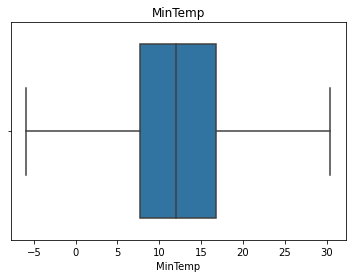

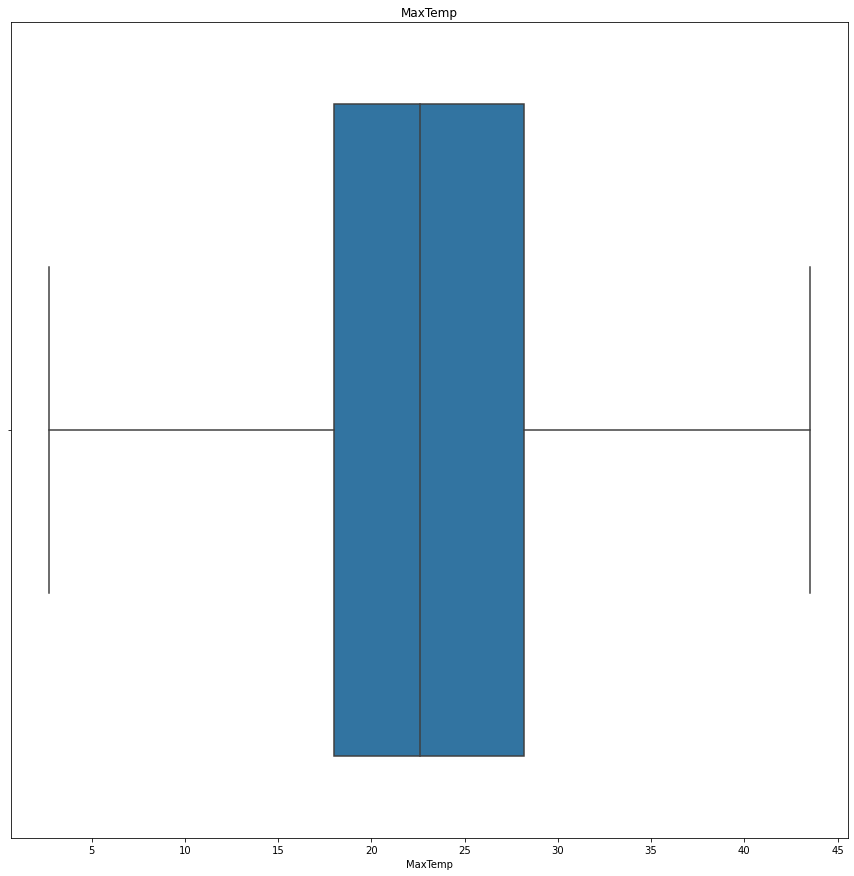

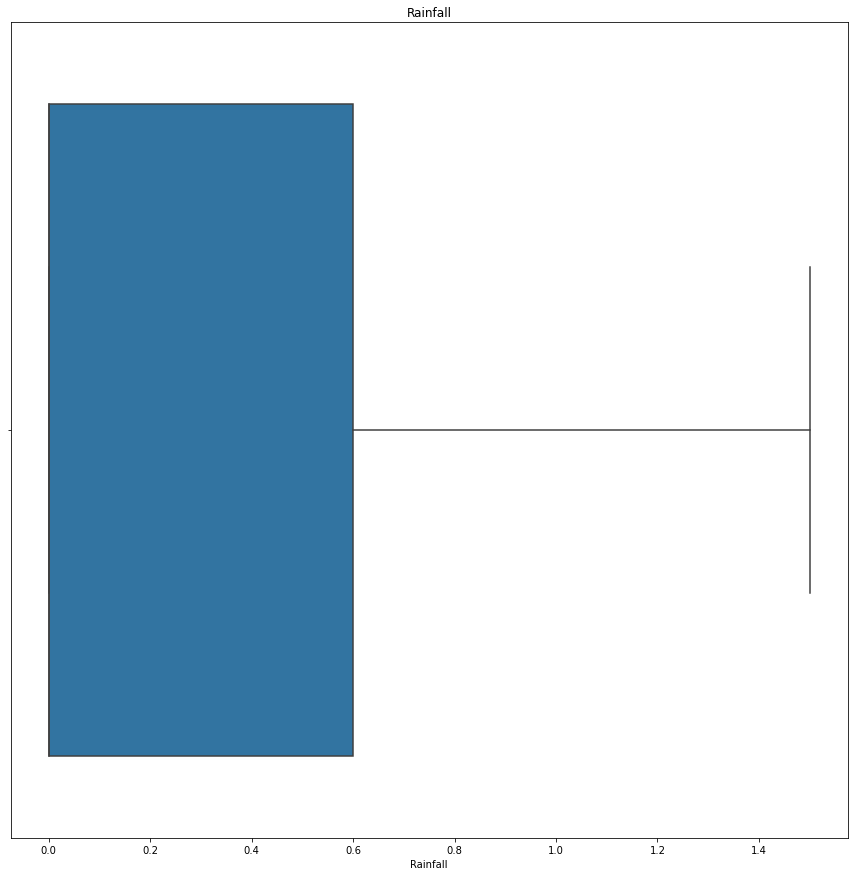

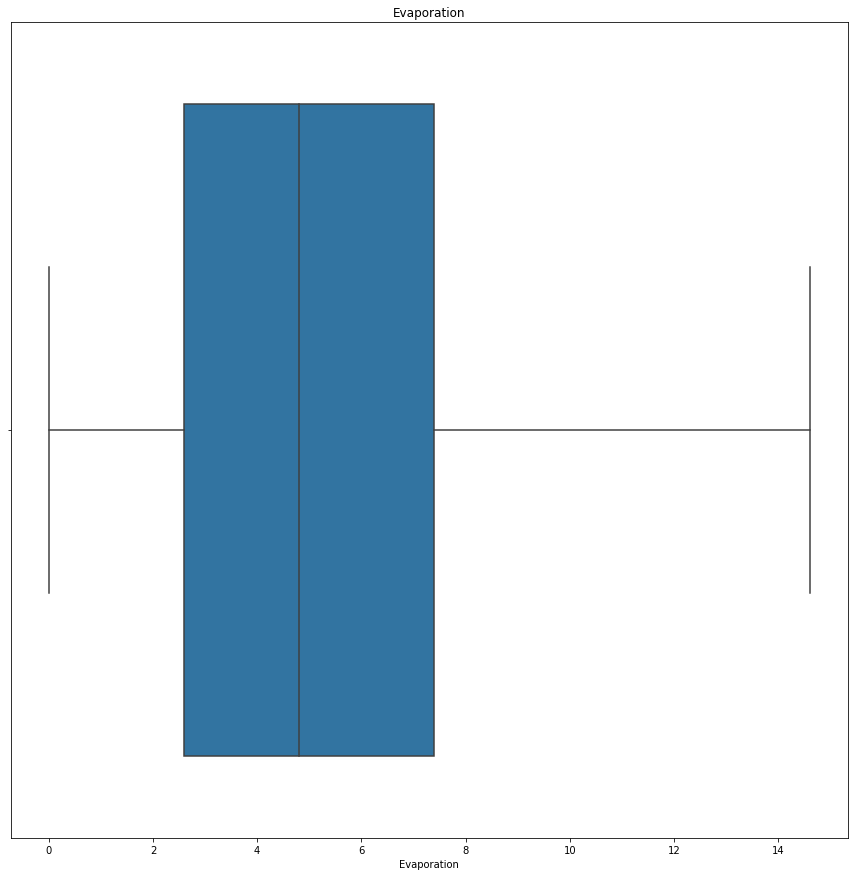

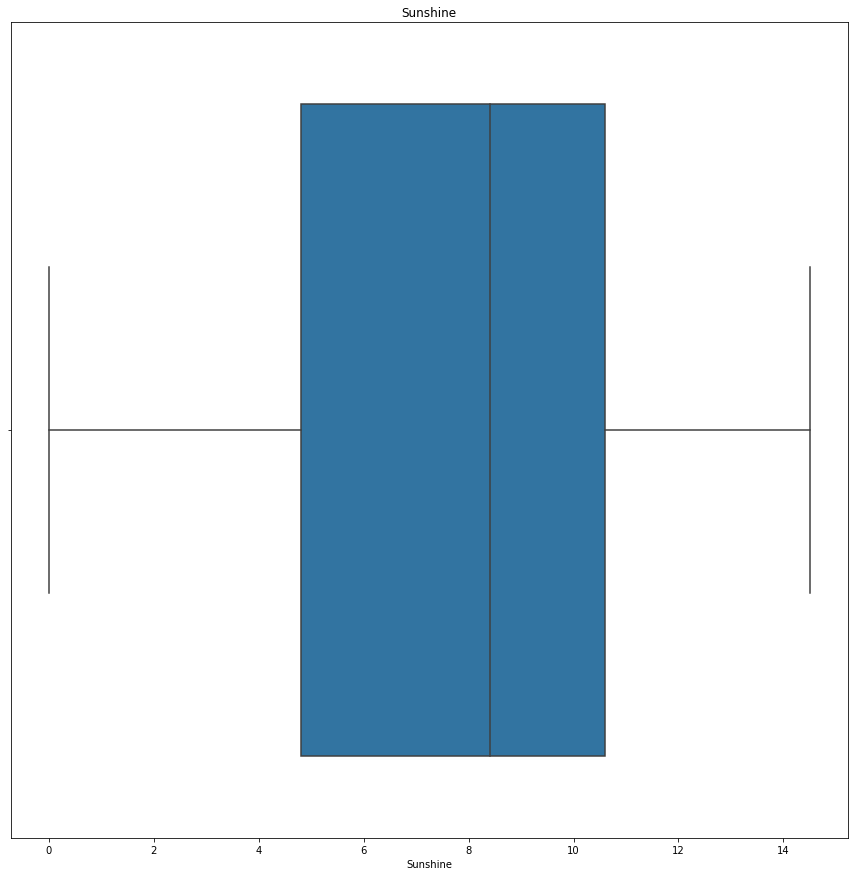

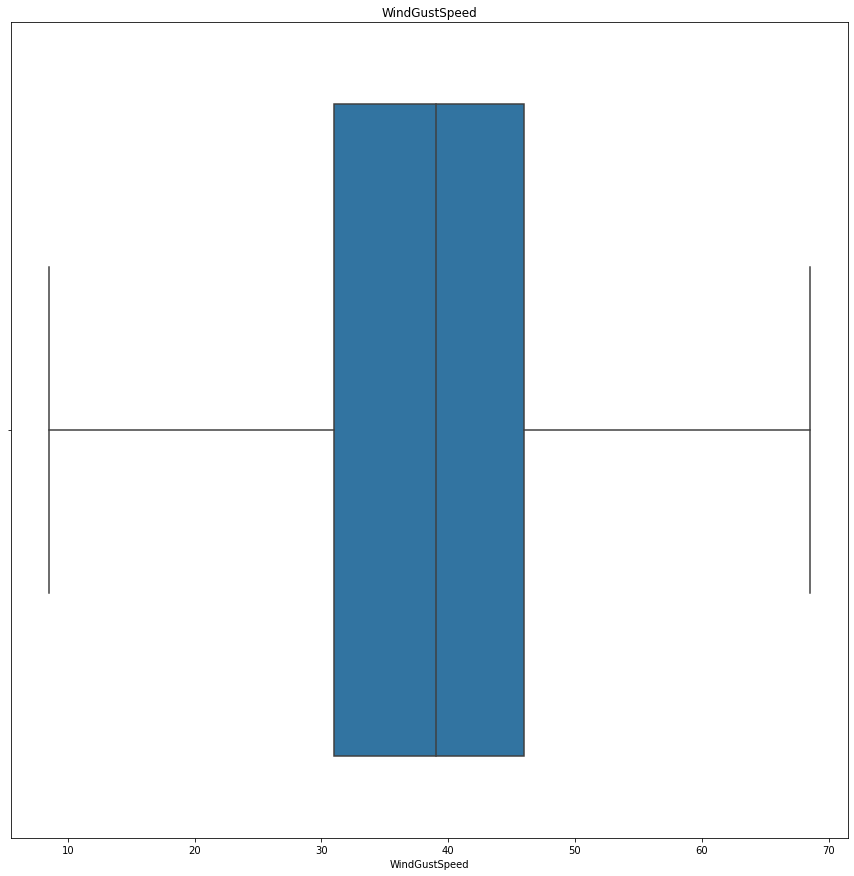

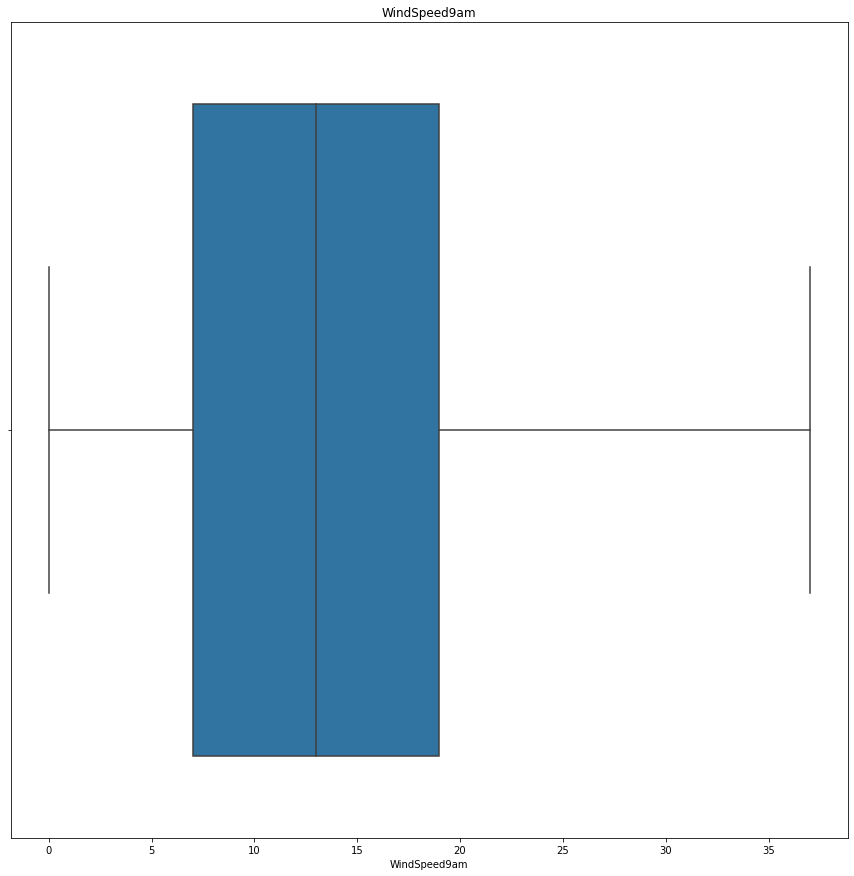

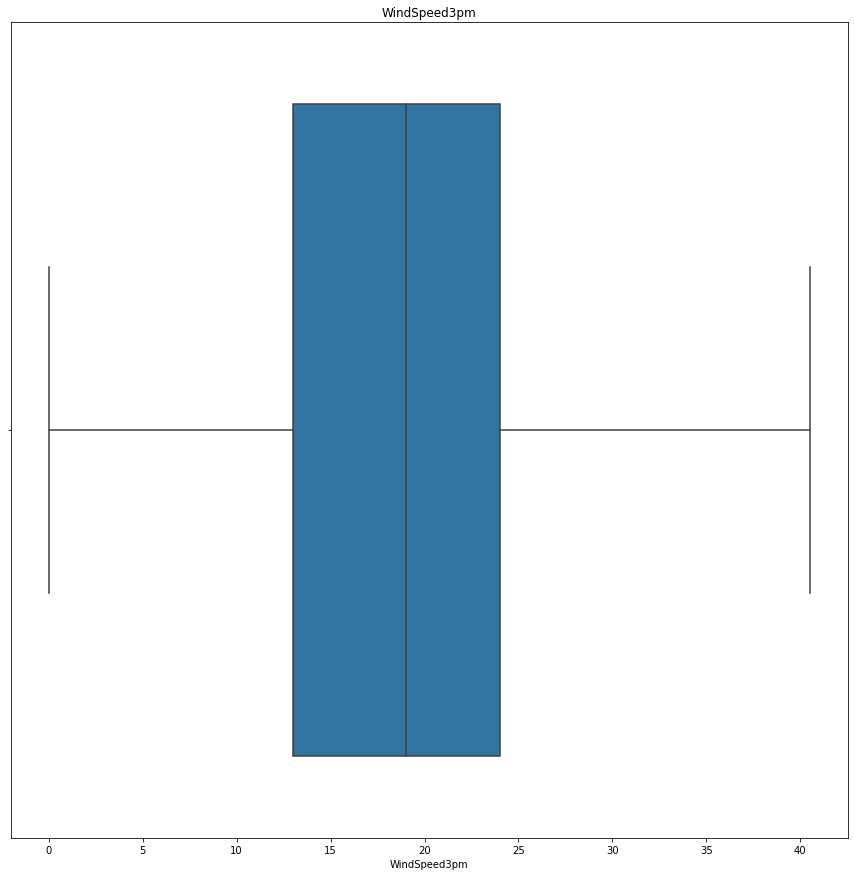

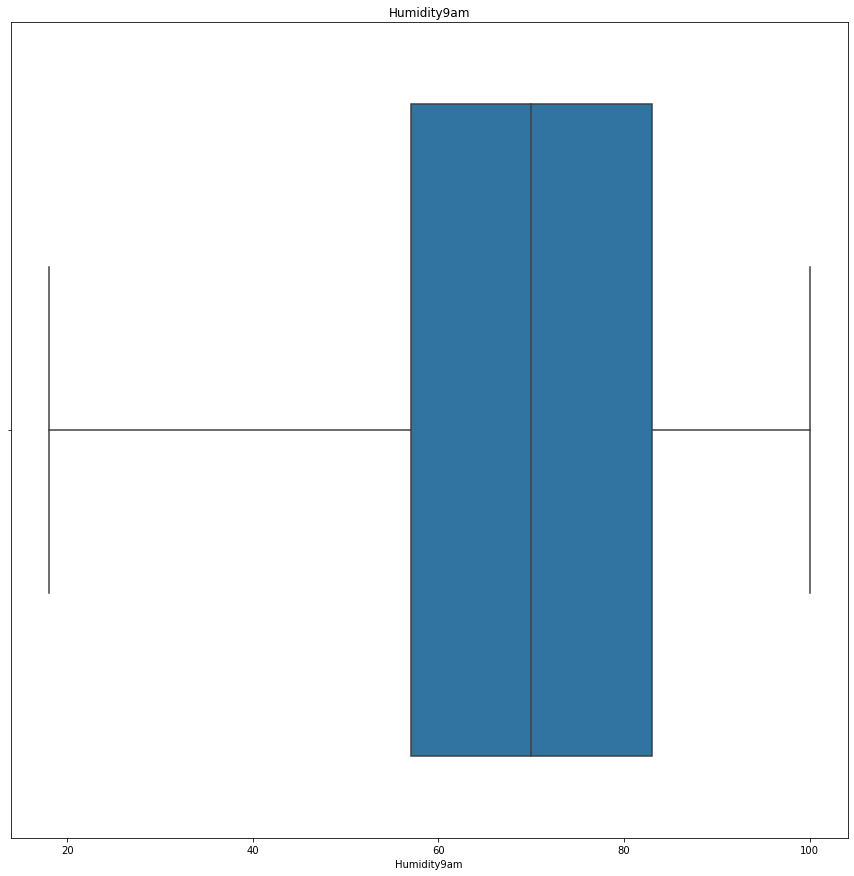

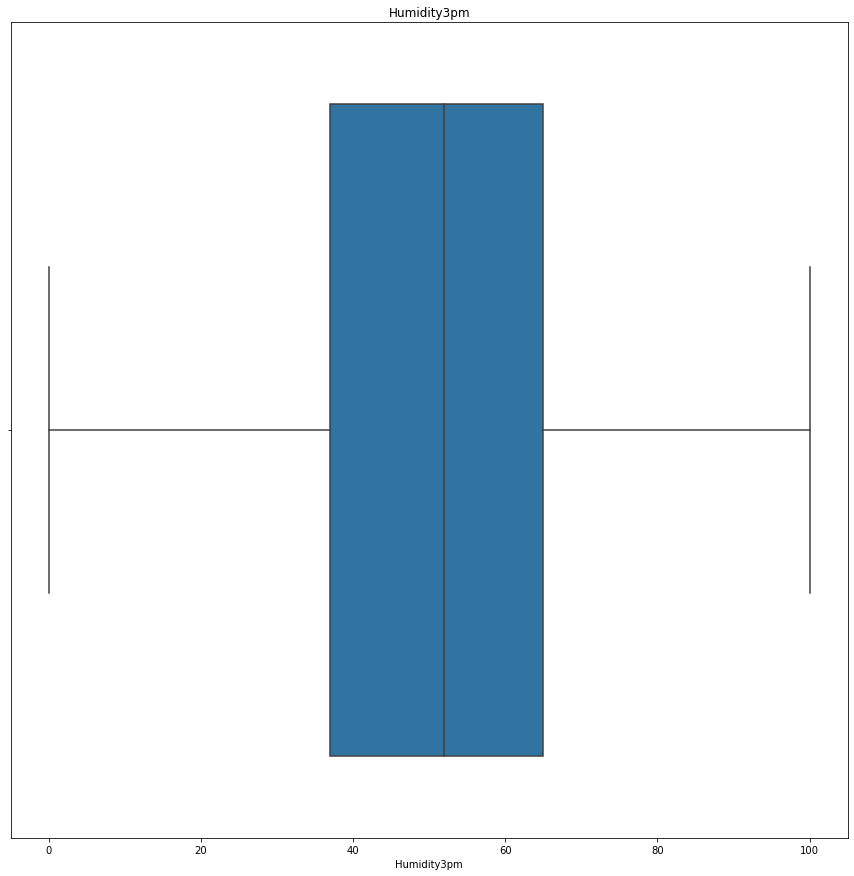

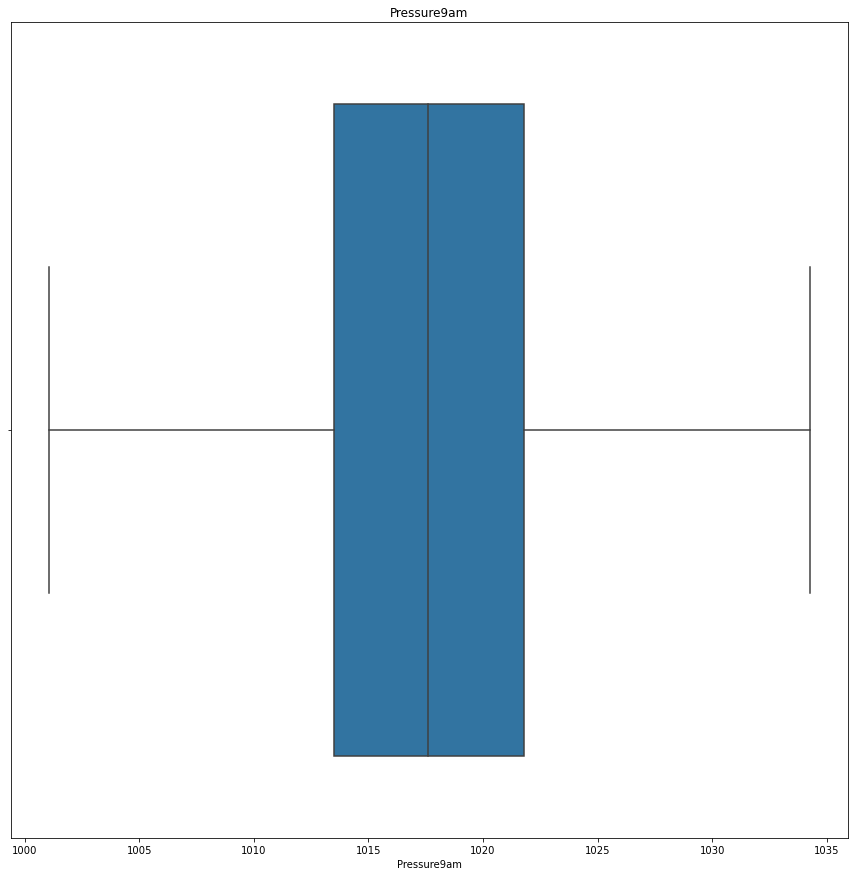

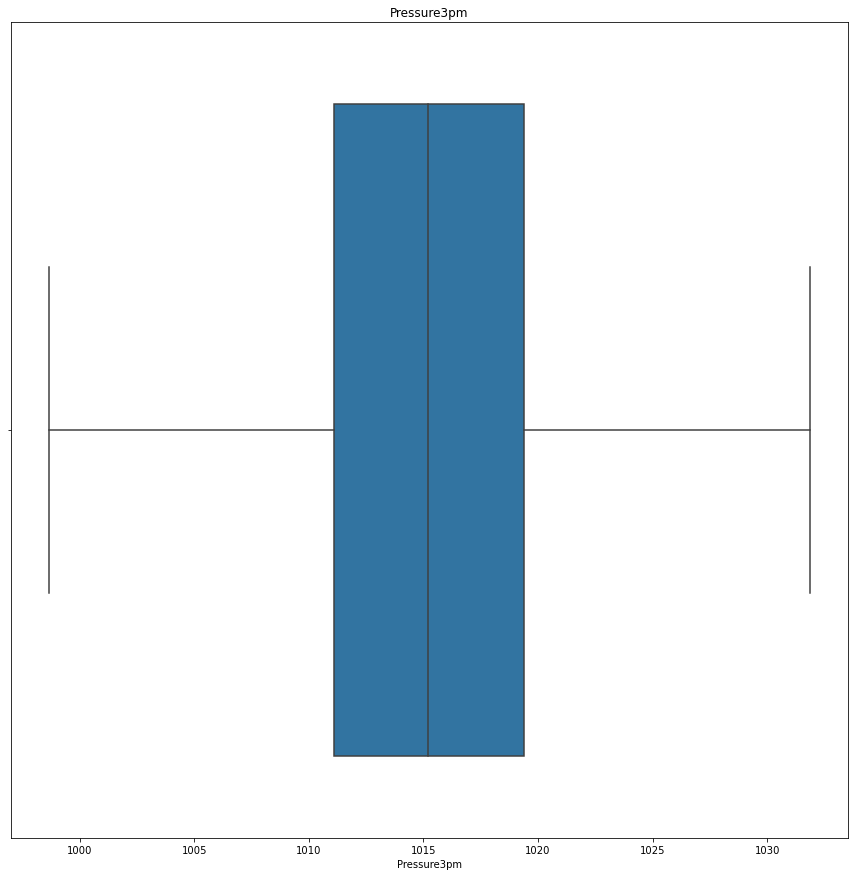

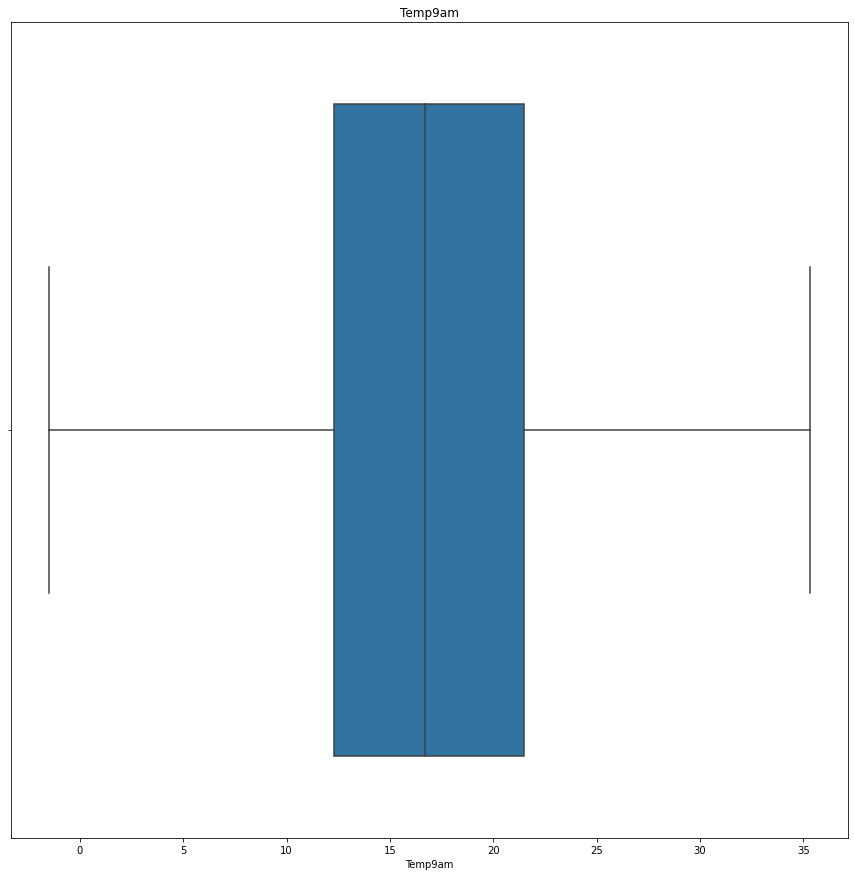

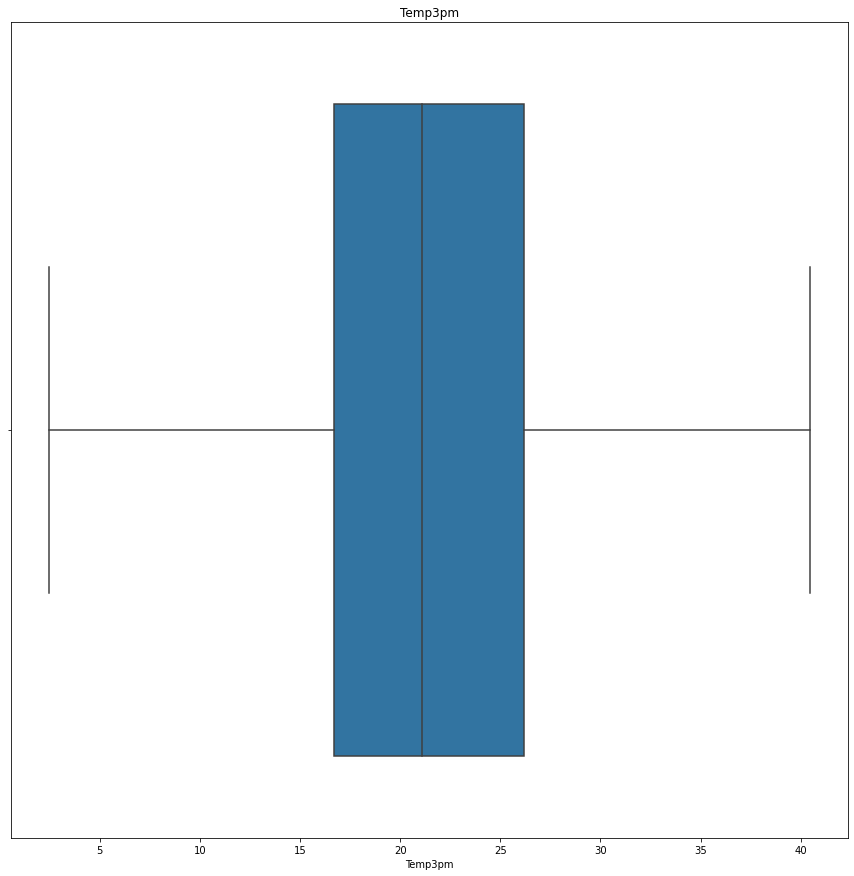

<Figure size 1080x1080 with 0 Axes>

In [53]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

MinTemp


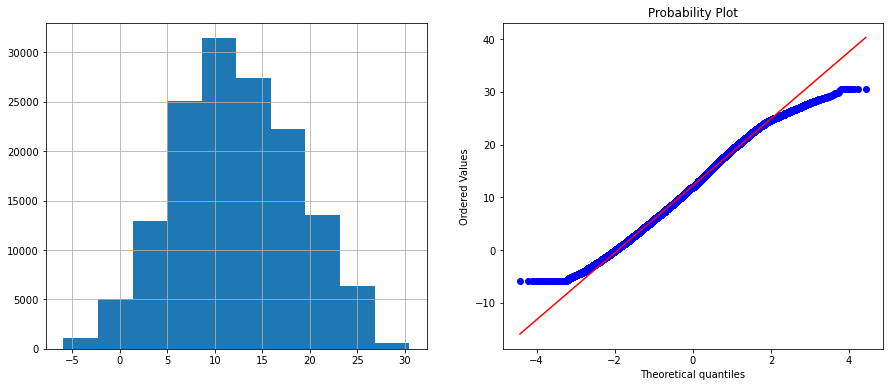

MaxTemp


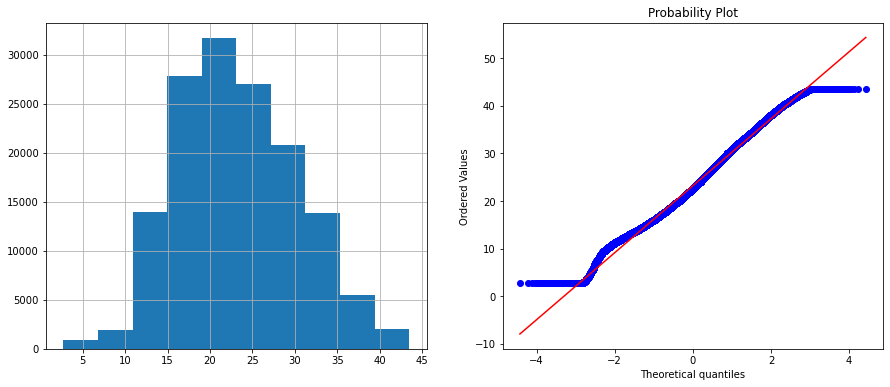

Rainfall


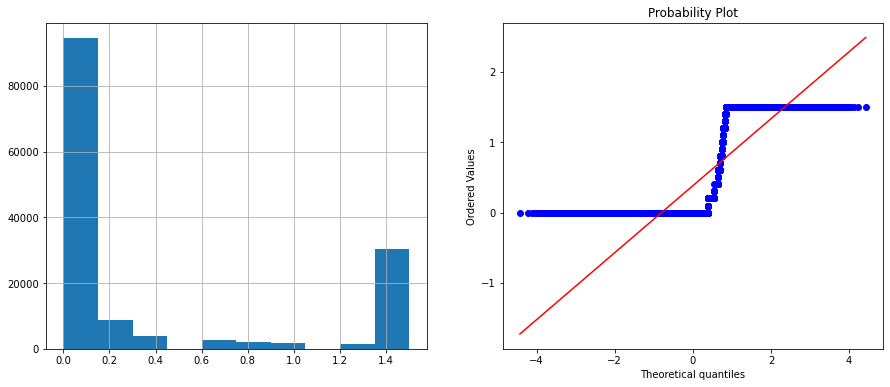

Evaporation


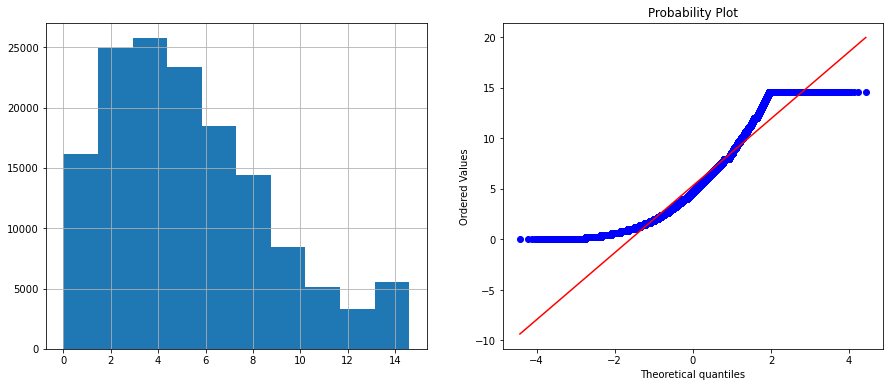

Sunshine


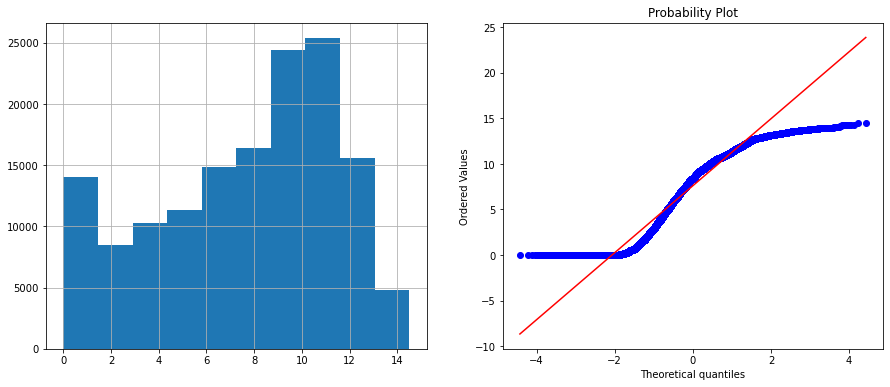

WindGustSpeed


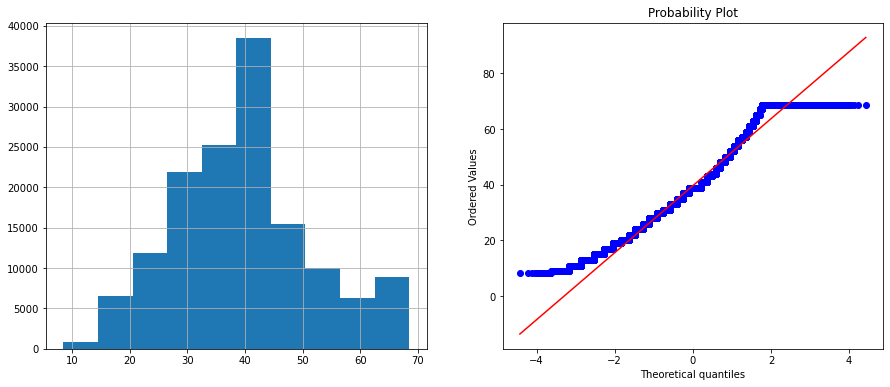

WindSpeed9am


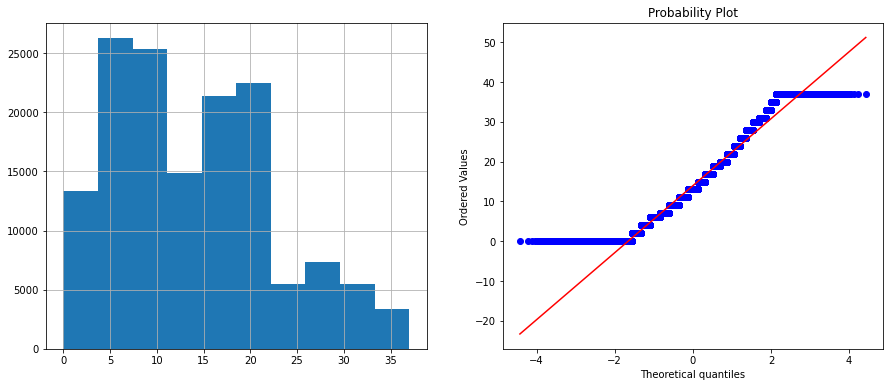

WindSpeed3pm


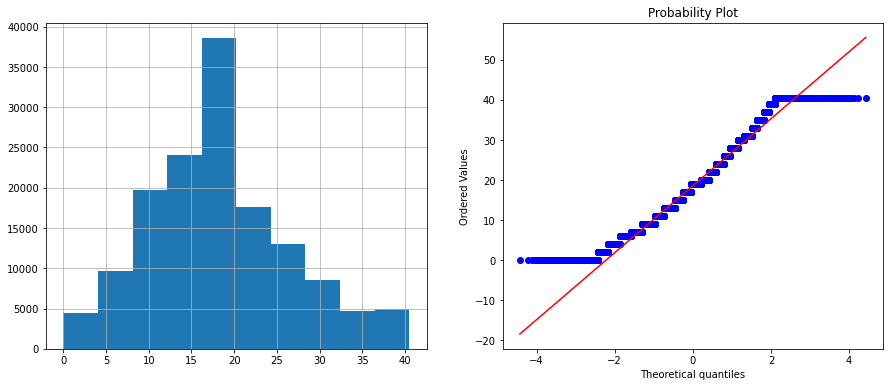

Humidity9am


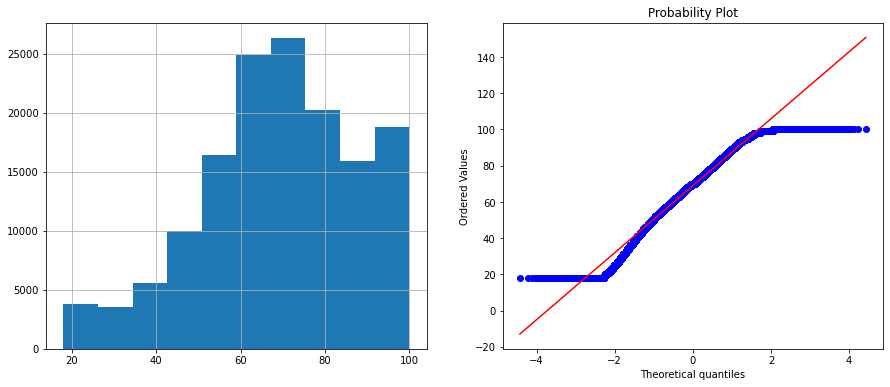

Humidity3pm


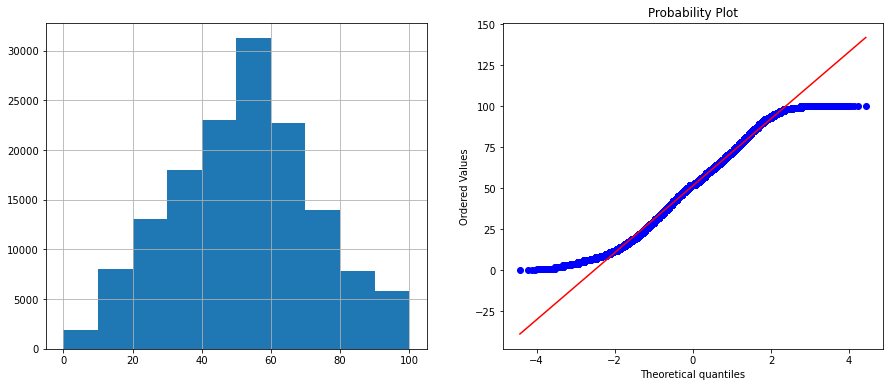

Pressure9am


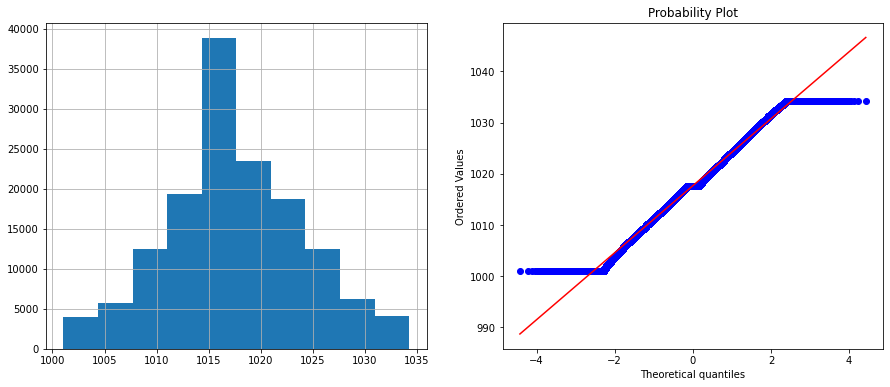

Pressure3pm


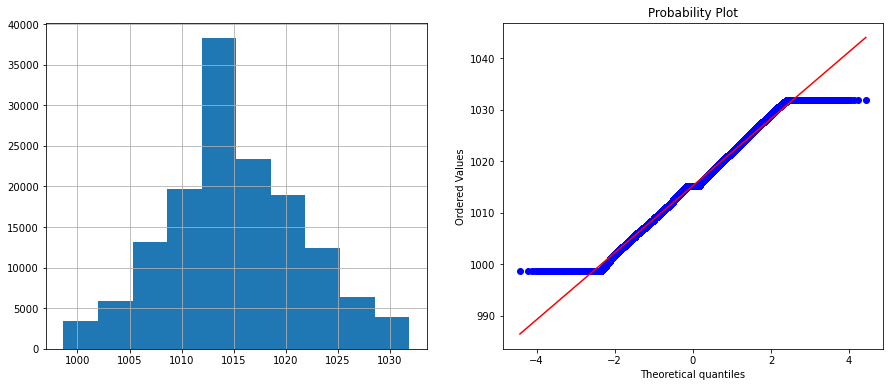

Temp9am


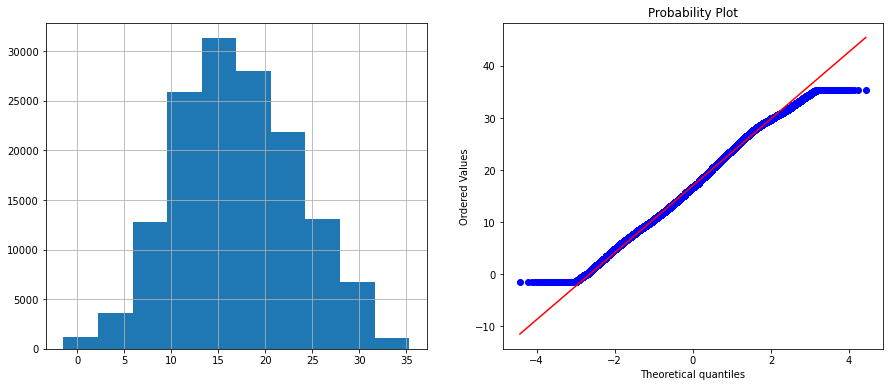

Temp3pm


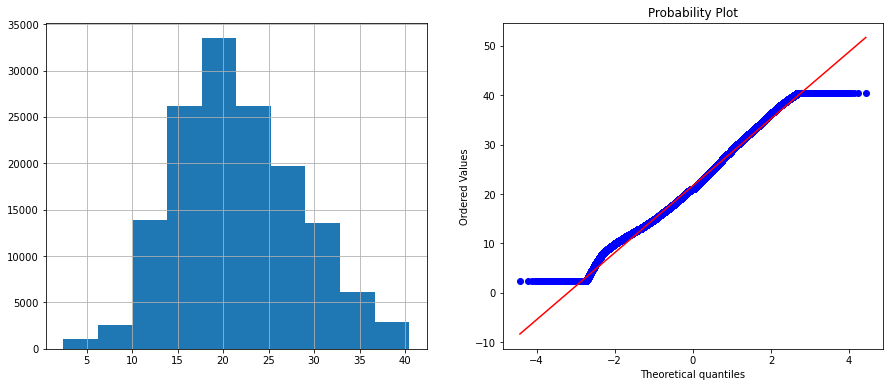

In [54]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

In [55]:
df.to_csv("preprocessed_1.csv", index=False)

In [56]:
X = df.drop(["RainTomorrow", "Date"], axis=1)
Y = df["RainTomorrow"]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

In [58]:
y_train

43447     0
140904    0
54615     0
109793    0
74462     0
         ..
106567    0
52791     1
56339     0
82299     1
115175    0
Name: RainTomorrow, Length: 116368, dtype: uint8

In [59]:
sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({0: 90866, 1: 25502})
The number of classes after fit Counter({0: 90866, 1: 90866})


In [60]:
accuracylis=[]

In [61]:
cat = CatBoostClassifier(iterations=2000, eval_metric = "AUC")
cat.fit(X_train_res, y_train_res)

Learning rate set to 0.050311
0:	total: 241ms	remaining: 8m 2s
1:	total: 320ms	remaining: 5m 19s
2:	total: 408ms	remaining: 4m 31s
3:	total: 494ms	remaining: 4m 6s
4:	total: 578ms	remaining: 3m 50s
5:	total: 656ms	remaining: 3m 37s
6:	total: 737ms	remaining: 3m 29s
7:	total: 827ms	remaining: 3m 25s
8:	total: 926ms	remaining: 3m 24s
9:	total: 1.03s	remaining: 3m 25s
10:	total: 1.11s	remaining: 3m 20s
11:	total: 1.18s	remaining: 3m 15s
12:	total: 1.26s	remaining: 3m 12s
13:	total: 1.34s	remaining: 3m 9s
14:	total: 1.41s	remaining: 3m 6s
15:	total: 1.49s	remaining: 3m 4s
16:	total: 1.56s	remaining: 3m 2s
17:	total: 1.65s	remaining: 3m 1s
18:	total: 1.74s	remaining: 3m 1s
19:	total: 1.82s	remaining: 2m 59s
20:	total: 1.9s	remaining: 2m 58s
21:	total: 1.97s	remaining: 2m 57s
22:	total: 2.05s	remaining: 2m 56s
23:	total: 2.13s	remaining: 2m 55s
24:	total: 2.21s	remaining: 2m 54s
25:	total: 2.3s	remaining: 2m 54s
26:	total: 2.38s	remaining: 2m 53s
27:	total: 2.46s	remaining: 2m 53s
28:	total:

231:	total: 18.6s	remaining: 2m 21s
232:	total: 18.7s	remaining: 2m 21s
233:	total: 18.7s	remaining: 2m 21s
234:	total: 18.8s	remaining: 2m 21s
235:	total: 18.9s	remaining: 2m 21s
236:	total: 19s	remaining: 2m 21s
237:	total: 19.1s	remaining: 2m 21s
238:	total: 19.2s	remaining: 2m 21s
239:	total: 19.3s	remaining: 2m 21s
240:	total: 19.4s	remaining: 2m 21s
241:	total: 19.5s	remaining: 2m 21s
242:	total: 19.5s	remaining: 2m 21s
243:	total: 19.6s	remaining: 2m 21s
244:	total: 19.7s	remaining: 2m 21s
245:	total: 19.8s	remaining: 2m 20s
246:	total: 19.8s	remaining: 2m 20s
247:	total: 19.9s	remaining: 2m 20s
248:	total: 20s	remaining: 2m 20s
249:	total: 20.1s	remaining: 2m 20s
250:	total: 20.1s	remaining: 2m 20s
251:	total: 20.2s	remaining: 2m 20s
252:	total: 20.3s	remaining: 2m 20s
253:	total: 20.4s	remaining: 2m 20s
254:	total: 20.4s	remaining: 2m 19s
255:	total: 20.5s	remaining: 2m 19s
256:	total: 20.6s	remaining: 2m 19s
257:	total: 20.7s	remaining: 2m 19s
258:	total: 20.8s	remaining: 2m 

462:	total: 37.1s	remaining: 2m 3s
463:	total: 37.2s	remaining: 2m 3s
464:	total: 37.3s	remaining: 2m 3s
465:	total: 37.4s	remaining: 2m 3s
466:	total: 37.5s	remaining: 2m 2s
467:	total: 37.5s	remaining: 2m 2s
468:	total: 37.6s	remaining: 2m 2s
469:	total: 37.7s	remaining: 2m 2s
470:	total: 37.8s	remaining: 2m 2s
471:	total: 37.9s	remaining: 2m 2s
472:	total: 37.9s	remaining: 2m 2s
473:	total: 38s	remaining: 2m 2s
474:	total: 38.1s	remaining: 2m 2s
475:	total: 38.2s	remaining: 2m 2s
476:	total: 38.3s	remaining: 2m 2s
477:	total: 38.3s	remaining: 2m 2s
478:	total: 38.4s	remaining: 2m 2s
479:	total: 38.5s	remaining: 2m 1s
480:	total: 38.6s	remaining: 2m 1s
481:	total: 38.7s	remaining: 2m 1s
482:	total: 38.7s	remaining: 2m 1s
483:	total: 38.8s	remaining: 2m 1s
484:	total: 38.9s	remaining: 2m 1s
485:	total: 39s	remaining: 2m 1s
486:	total: 39s	remaining: 2m 1s
487:	total: 39.1s	remaining: 2m 1s
488:	total: 39.2s	remaining: 2m 1s
489:	total: 39.3s	remaining: 2m 1s
490:	total: 39.4s	remainin

694:	total: 55.6s	remaining: 1m 44s
695:	total: 55.7s	remaining: 1m 44s
696:	total: 55.8s	remaining: 1m 44s
697:	total: 55.8s	remaining: 1m 44s
698:	total: 55.9s	remaining: 1m 44s
699:	total: 56s	remaining: 1m 44s
700:	total: 56.1s	remaining: 1m 43s
701:	total: 56.2s	remaining: 1m 43s
702:	total: 56.2s	remaining: 1m 43s
703:	total: 56.3s	remaining: 1m 43s
704:	total: 56.4s	remaining: 1m 43s
705:	total: 56.5s	remaining: 1m 43s
706:	total: 56.5s	remaining: 1m 43s
707:	total: 56.6s	remaining: 1m 43s
708:	total: 56.7s	remaining: 1m 43s
709:	total: 56.8s	remaining: 1m 43s
710:	total: 56.9s	remaining: 1m 43s
711:	total: 56.9s	remaining: 1m 42s
712:	total: 57s	remaining: 1m 42s
713:	total: 57.1s	remaining: 1m 42s
714:	total: 57.2s	remaining: 1m 42s
715:	total: 57.2s	remaining: 1m 42s
716:	total: 57.3s	remaining: 1m 42s
717:	total: 57.4s	remaining: 1m 42s
718:	total: 57.5s	remaining: 1m 42s
719:	total: 57.5s	remaining: 1m 42s
720:	total: 57.6s	remaining: 1m 42s
721:	total: 57.7s	remaining: 1m 

924:	total: 1m 12s	remaining: 1m 24s
925:	total: 1m 12s	remaining: 1m 24s
926:	total: 1m 12s	remaining: 1m 23s
927:	total: 1m 12s	remaining: 1m 23s
928:	total: 1m 12s	remaining: 1m 23s
929:	total: 1m 12s	remaining: 1m 23s
930:	total: 1m 12s	remaining: 1m 23s
931:	total: 1m 12s	remaining: 1m 23s
932:	total: 1m 12s	remaining: 1m 23s
933:	total: 1m 13s	remaining: 1m 23s
934:	total: 1m 13s	remaining: 1m 23s
935:	total: 1m 13s	remaining: 1m 23s
936:	total: 1m 13s	remaining: 1m 23s
937:	total: 1m 13s	remaining: 1m 23s
938:	total: 1m 13s	remaining: 1m 22s
939:	total: 1m 13s	remaining: 1m 22s
940:	total: 1m 13s	remaining: 1m 22s
941:	total: 1m 13s	remaining: 1m 22s
942:	total: 1m 13s	remaining: 1m 22s
943:	total: 1m 13s	remaining: 1m 22s
944:	total: 1m 13s	remaining: 1m 22s
945:	total: 1m 13s	remaining: 1m 22s
946:	total: 1m 13s	remaining: 1m 22s
947:	total: 1m 13s	remaining: 1m 22s
948:	total: 1m 14s	remaining: 1m 22s
949:	total: 1m 14s	remaining: 1m 21s
950:	total: 1m 14s	remaining: 1m 21s
9

1145:	total: 1m 27s	remaining: 1m 5s
1146:	total: 1m 27s	remaining: 1m 5s
1147:	total: 1m 27s	remaining: 1m 5s
1148:	total: 1m 27s	remaining: 1m 5s
1149:	total: 1m 27s	remaining: 1m 4s
1150:	total: 1m 27s	remaining: 1m 4s
1151:	total: 1m 28s	remaining: 1m 4s
1152:	total: 1m 28s	remaining: 1m 4s
1153:	total: 1m 28s	remaining: 1m 4s
1154:	total: 1m 28s	remaining: 1m 4s
1155:	total: 1m 28s	remaining: 1m 4s
1156:	total: 1m 28s	remaining: 1m 4s
1157:	total: 1m 28s	remaining: 1m 4s
1158:	total: 1m 28s	remaining: 1m 4s
1159:	total: 1m 28s	remaining: 1m 4s
1160:	total: 1m 28s	remaining: 1m 4s
1161:	total: 1m 28s	remaining: 1m 4s
1162:	total: 1m 28s	remaining: 1m 3s
1163:	total: 1m 28s	remaining: 1m 3s
1164:	total: 1m 28s	remaining: 1m 3s
1165:	total: 1m 29s	remaining: 1m 3s
1166:	total: 1m 29s	remaining: 1m 3s
1167:	total: 1m 29s	remaining: 1m 3s
1168:	total: 1m 29s	remaining: 1m 3s
1169:	total: 1m 29s	remaining: 1m 3s
1170:	total: 1m 29s	remaining: 1m 3s
1171:	total: 1m 29s	remaining: 1m 3s
1

1371:	total: 1m 43s	remaining: 47.3s
1372:	total: 1m 43s	remaining: 47.2s
1373:	total: 1m 43s	remaining: 47.1s
1374:	total: 1m 43s	remaining: 47.1s
1375:	total: 1m 43s	remaining: 47s
1376:	total: 1m 43s	remaining: 46.9s
1377:	total: 1m 43s	remaining: 46.8s
1378:	total: 1m 43s	remaining: 46.8s
1379:	total: 1m 43s	remaining: 46.7s
1380:	total: 1m 43s	remaining: 46.6s
1381:	total: 1m 44s	remaining: 46.5s
1382:	total: 1m 44s	remaining: 46.4s
1383:	total: 1m 44s	remaining: 46.4s
1384:	total: 1m 44s	remaining: 46.3s
1385:	total: 1m 44s	remaining: 46.2s
1386:	total: 1m 44s	remaining: 46.1s
1387:	total: 1m 44s	remaining: 46s
1388:	total: 1m 44s	remaining: 46s
1389:	total: 1m 44s	remaining: 45.9s
1390:	total: 1m 44s	remaining: 45.8s
1391:	total: 1m 44s	remaining: 45.7s
1392:	total: 1m 44s	remaining: 45.7s
1393:	total: 1m 44s	remaining: 45.6s
1394:	total: 1m 44s	remaining: 45.5s
1395:	total: 1m 44s	remaining: 45.4s
1396:	total: 1m 45s	remaining: 45.4s
1397:	total: 1m 45s	remaining: 45.3s
1398:	t

1597:	total: 2m	remaining: 30.3s
1598:	total: 2m	remaining: 30.2s
1599:	total: 2m	remaining: 30.2s
1600:	total: 2m	remaining: 30.1s
1601:	total: 2m	remaining: 30s
1602:	total: 2m	remaining: 29.9s
1603:	total: 2m	remaining: 29.8s
1604:	total: 2m	remaining: 29.8s
1605:	total: 2m 1s	remaining: 29.7s
1606:	total: 2m 1s	remaining: 29.6s
1607:	total: 2m 1s	remaining: 29.5s
1608:	total: 2m 1s	remaining: 29.5s
1609:	total: 2m 1s	remaining: 29.4s
1610:	total: 2m 1s	remaining: 29.3s
1611:	total: 2m 1s	remaining: 29.2s
1612:	total: 2m 1s	remaining: 29.1s
1613:	total: 2m 1s	remaining: 29.1s
1614:	total: 2m 1s	remaining: 29s
1615:	total: 2m 1s	remaining: 28.9s
1616:	total: 2m 1s	remaining: 28.8s
1617:	total: 2m 1s	remaining: 28.8s
1618:	total: 2m 1s	remaining: 28.7s
1619:	total: 2m 1s	remaining: 28.6s
1620:	total: 2m 2s	remaining: 28.5s
1621:	total: 2m 2s	remaining: 28.5s
1622:	total: 2m 2s	remaining: 28.4s
1623:	total: 2m 2s	remaining: 28.3s
1624:	total: 2m 2s	remaining: 28.2s
1625:	total: 2m 2s	r

1825:	total: 2m 17s	remaining: 13.1s
1826:	total: 2m 17s	remaining: 13s
1827:	total: 2m 17s	remaining: 12.9s
1828:	total: 2m 17s	remaining: 12.8s
1829:	total: 2m 17s	remaining: 12.8s
1830:	total: 2m 17s	remaining: 12.7s
1831:	total: 2m 17s	remaining: 12.6s
1832:	total: 2m 17s	remaining: 12.5s
1833:	total: 2m 17s	remaining: 12.5s
1834:	total: 2m 17s	remaining: 12.4s
1835:	total: 2m 17s	remaining: 12.3s
1836:	total: 2m 18s	remaining: 12.2s
1837:	total: 2m 18s	remaining: 12.2s
1838:	total: 2m 18s	remaining: 12.1s
1839:	total: 2m 18s	remaining: 12s
1840:	total: 2m 18s	remaining: 11.9s
1841:	total: 2m 18s	remaining: 11.9s
1842:	total: 2m 18s	remaining: 11.8s
1843:	total: 2m 18s	remaining: 11.7s
1844:	total: 2m 18s	remaining: 11.6s
1845:	total: 2m 18s	remaining: 11.6s
1846:	total: 2m 18s	remaining: 11.5s
1847:	total: 2m 18s	remaining: 11.4s
1848:	total: 2m 18s	remaining: 11.3s
1849:	total: 2m 19s	remaining: 11.3s
1850:	total: 2m 19s	remaining: 11.2s
1851:	total: 2m 19s	remaining: 11.1s
1852:

In [62]:
y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
accuracylis.append(accuracy_score(y_test,y_pred))

[[21511  1206]
 [ 2793  3582]]
0.8625395297676337
              precision    recall  f1-score   support

           0       0.89      0.95      0.91     22717
           1       0.75      0.56      0.64      6375

    accuracy                           0.86     29092
   macro avg       0.82      0.75      0.78     29092
weighted avg       0.86      0.86      0.86     29092



C:\Users\dy0119\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7543971785835433

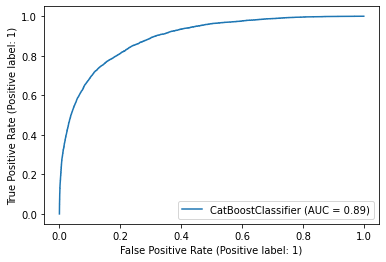

In [63]:
metrics.plot_roc_curve(cat, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 

In [64]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [65]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
accuracylis.append(accuracy_score(y_test,y_pred1))

[[20636  2081]
 [ 2469  3906]]
0.8435996150144369
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     22717
           1       0.65      0.61      0.63      6375

    accuracy                           0.84     29092
   macro avg       0.77      0.76      0.77     29092
weighted avg       0.84      0.84      0.84     29092



C:\Users\dy0119\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7605502383547952

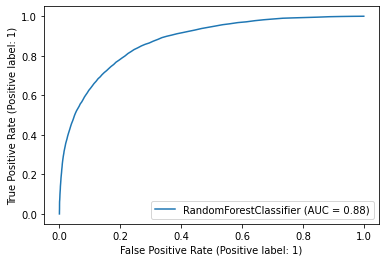

In [66]:
metrics.plot_roc_curve(rf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None) 

In [67]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

C:\Users\dy0119\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
accuracylis.append(accuracy_score(y_test,y_pred2))

[[17503  5214]
 [ 1515  4860]]
0.7686992987762958
              precision    recall  f1-score   support

           0       0.92      0.77      0.84     22717
           1       0.48      0.76      0.59      6375

    accuracy                           0.77     29092
   macro avg       0.70      0.77      0.71     29092
weighted avg       0.82      0.77      0.78     29092



C:\Users\dy0119\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7664165991263344

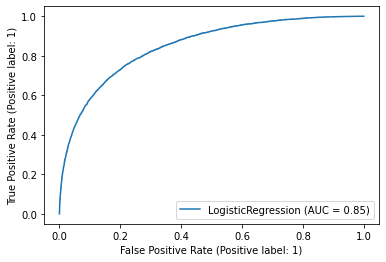

In [69]:
metrics.plot_roc_curve(logreg, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred2, average=None) 

In [70]:
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)

GaussianNB()

In [71]:
y_pred3 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))
accuracylis.append(accuracy_score(y_test,y_pred3))

[[17078  5639]
 [ 1661  4714]]
0.7490719098033823
              precision    recall  f1-score   support

           0       0.91      0.75      0.82     22717
           1       0.46      0.74      0.56      6375

    accuracy                           0.75     29092
   macro avg       0.68      0.75      0.69     29092
weighted avg       0.81      0.75      0.77     29092



C:\Users\dy0119\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7456113906230715

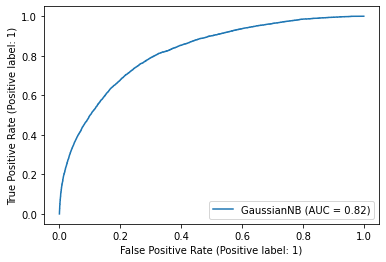

In [72]:
metrics.plot_roc_curve(gnb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred3, average=None)

In [73]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=3)

In [74]:
y_pred4 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))
accuracylis.append(accuracy_score(y_test,y_pred4))

[[17305  5412]
 [ 1770  4605]]
0.7531280076997112
              precision    recall  f1-score   support

           0       0.91      0.76      0.83     22717
           1       0.46      0.72      0.56      6375

    accuracy                           0.75     29092
   macro avg       0.68      0.74      0.70     29092
weighted avg       0.81      0.75      0.77     29092



C:\Users\dy0119\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7420586293239839

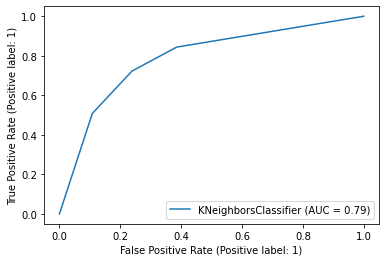

In [75]:
metrics.plot_roc_curve(knn, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred4, average=None) 

In [76]:
xgb = XGBClassifier()
xgb.fit(X_train_res, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [77]:
y_pred6 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6))
accuracylis.append(accuracy_score(y_test,y_pred6))

[[21393  1324]
 [ 2855  3520]]
0.8563522617901829
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     22717
           1       0.73      0.55      0.63      6375

    accuracy                           0.86     29092
   macro avg       0.80      0.75      0.77     29092
weighted avg       0.85      0.86      0.85     29092



C:\Users\dy0119\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7469372595628911

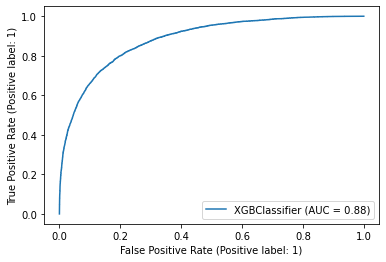

In [78]:
metrics.plot_roc_curve(xgb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred6, average=None) 

In [79]:
'''svc = SVC(kernel='linear')
svc.fit(X_train_res, y_train_res)'''

"svc = SVC(kernel='linear')\nsvc.fit(X_train_res, y_train_res)"

In [80]:
'''y_pred5 = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))
accuracylis.append(accuracy_score(y_test,y_pred5))'''

'y_pred5 = svc.predict(X_test)\nprint(confusion_matrix(y_test,y_pred5))\nprint(accuracy_score(y_test,y_pred5))\nprint(classification_report(y_test,y_pred5))\naccuracylis.append(accuracy_score(y_test,y_pred5))'

In [81]:
'''metrics.plot_roc_curve(svc, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred5, average=None) '''

'metrics.plot_roc_curve(svc, X_test, y_test)\nmetrics.roc_auc_score(y_test, y_pred5, average=None) '

In [82]:
entries = os.listdir('.')
print(entries)
os.chdir('./Models')


['.ipynb_checkpoints', 'app.ipynb', 'app.py', 'catboost_info', 'Models', 'preprocessed_1.csv', 'Rainfall-Prediction-Web scrap.ipynb', 'Rainfall-Prediction5502.ipynb', 'Rainfallpredictiondataset.csv', 'static', 'template']


In [83]:
joblib.dump(rf, "rf.pkl")
joblib.dump(cat, "cat.pkl")
joblib.dump(logreg, "logreg.pkl")
joblib.dump(gnb, "gnb.pkl")
joblib.dump(knn, "knn.pkl")
joblib.dump(xgb, "xgb.pkl")

['xgb.pkl']

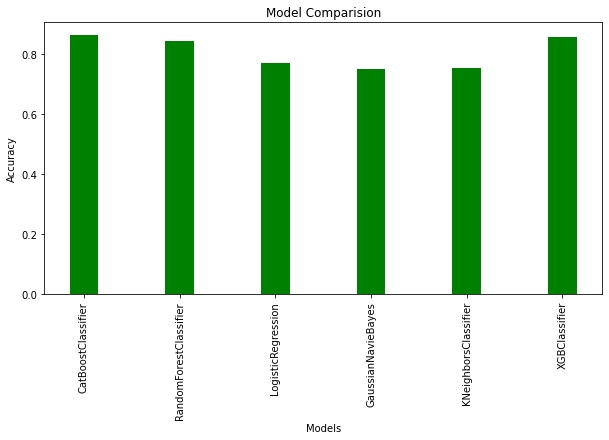

In [84]:
models=['CatBoostClassifier','RandomForestClassifier','LogisticRegression','GaussianNavieBayes','KNeighborsClassifier','XGBClassifier']
fig=plt.figure(figsize=(10,5))
plt.bar(models,accuracylis,color='g',width=0.3)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparision')
plt.xticks(rotation=90)
plt.show()

In [85]:
print(accuracylis)

[0.8625395297676337, 0.8435996150144369, 0.7686992987762958, 0.7490719098033823, 0.7531280076997112, 0.8563522617901829]


In [86]:
os.chdir('..')
entries = os.listdir('.')
print(entries)

['.ipynb_checkpoints', 'app.ipynb', 'app.py', 'catboost_info', 'Models', 'preprocessed_1.csv', 'Rainfall-Prediction-Web scrap.ipynb', 'Rainfall-Prediction5502.ipynb', 'Rainfallpredictiondataset.csv', 'static', 'template']
